In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

### 1. Импорт и анализ таблиц

In [2]:
data = pd.read_excel('датасет.xlsx', sheet_name = 'Данные')
clients = pd.read_excel('датасет.xlsx', sheet_name = 'Clients')
region_dict = pd.read_excel('датасет.xlsx', sheet_name = 'Region_dict')

In [3]:
# Сохранение исходных размеров таблиц
data_rows_before = data.shape[0]
clients_rows_before = clients.shape[0]
region_dict_rows_before = region_dict.shape[0]

# Вывод размеров таблиц и пропусков до обработки
print("Размеры таблиц до обработки пропусков:")
print(f"Таблица 'Данные': {data.shape}")
print(f"Таблица 'Clients': {clients.shape}")
print(f"Таблица 'Region_dict': {region_dict.shape}")

print("\nПропущенные значения до обработки:")
print("Таблица 'Данные':")
print(data.isna().sum())
print("Таблица 'Clients':")
print(clients.isna().sum())
print("Таблица 'Region_dict':")
print(region_dict.isna().sum())

# Обработка пропусков в таблице 'Данные'
# Шаг 1: Удаление строк с пропусками в id_order или id_client или dtime_pay
rows_missing_key_columns = data[data[['id_order', 'id_client', 'dtime_pay']].isna().any(axis = 1)].shape[0]
if rows_missing_key_columns > 0:
    data = data.dropna(subset = ['id_order', 'id_client', 'dtime_pay'], how = 'any')
    print(f"\n1) Удалено {rows_missing_key_columns} строк в таблице 'Данные' с пропусками в 'id_order' или 'id_client' или 'dtime_pay'.")

# Шаг 2: Замена NaN в amt_payment на 0
rows_amt_missing = data[data['amt_payment'].isna()].shape[0]
if rows_amt_missing > 0:
    data.loc[data['amt_payment'].isna(), 'amt_payment'] = 0
    print(f"2) Заменено {rows_amt_missing} пропусков в 'amt_payment' на 0 в таблице 'Данные'.")
else:
    print(f"2) После удаления строк в этих трех столбцах таблицы 'Данные' - строк с пропусками в столбце 'amt_payment' не осталось.\n"
    f"Т.о. замен на 0 в столбце 'amt_payment' произведено не было.")
    
# Обработка пропусков в таблице 'Clients' - удаление строк с пропусками в любом столбце
rows_clients_missing = clients[clients.isna().any(axis = 1)].shape[0]
if rows_clients_missing > 0:
    clients = clients.dropna()
    print(f"3) Удалено {rows_clients_missing} строк в таблице 'Clients' с пропусками в любом столбце.")

# Обработка пропусков в таблице 'Region_dict' - удаление строк с пропусками в любом столбце
rows_region_dict_missing = region_dict[region_dict.isna().any(axis = 1)].shape[0]
if rows_region_dict_missing > 0:
    region_dict = region_dict.dropna()
    print(f"4) Удалено {rows_region_dict_missing} строк в таблице 'Region_dict' с пропусками в любом столбце.")
else:
    print("4) В таблице 'Region_dict' пропусков нет, удаление не требуется.")

# Проверка пропусков после обработки
print("\nПропущенные значения после обработки:")
print("Таблица 'Данные':")
print(data.isna().sum())
print("Таблица 'Clients':")
print(clients.isna().sum())
print("Таблица 'Region_dict':")
print(region_dict.isna().sum())

# Вывод размеров таблиц после обработки
print("\nРазмеры таблиц после обработки пропусков:")
print(f"Таблица 'Данные': {data.shape}")
print(f"Таблица 'Clients': {clients.shape}")
print(f"Таблица 'Region_dict': {region_dict.shape}")

# Расчёт и вывод процента потерянных строк в каждой таблице
print("\nПроцент потерянных строк:")
data_rows_after = data.shape[0]
data_loss_percent = ((data_rows_before - data_rows_after) / data_rows_before) * 100 if data_rows_before > 0 else 0
print(f"Таблица 'Данные': {data_loss_percent:.2f}% ({data_rows_before - data_rows_after} строк удалено)")

clients_rows_after = clients.shape[0]
clients_loss_percent = ((clients_rows_before - clients_rows_after) / clients_rows_before) * 100 if clients_rows_before > 0 else 0
print(f"Таблица 'Clients': {clients_loss_percent:.2f}% ({clients_rows_before - clients_rows_after} строк удалено)")

region_dict_rows_after = region_dict.shape[0]
region_dict_loss_percent = ((region_dict_rows_before - region_dict_rows_after) / region_dict_rows_before) * 100 if region_dict_rows_before > 0 else 0
print(f"Таблица 'Region_dict': {region_dict_loss_percent:.2f}% ({region_dict_rows_before - region_dict_rows_after} строк удалено)")

# Расчёт и вывод общего процента потерянных строк во всех таблицах
total_rows_before = data_rows_before + clients_rows_before + region_dict_rows_before
total_rows_after = data_rows_after + clients_rows_after + region_dict_rows_after
total_loss_percent = ((total_rows_before - total_rows_after) / total_rows_before) * 100 if total_rows_before > 0 else 0
if total_loss_percent <= 5:
    print(f"Общий процент потерянных строк во всех таблицах: {total_loss_percent:.2f}% ({total_rows_before - total_rows_after} строк удалено), "
        f"что является приемлемым процентом потерь при очистке данных.")
else:
    print(f"Общий процент потерянных строк во всех таблицах: {total_loss_percent:.2f}% ({total_rows_before - total_rows_after} строк удалено), "
        f"что является нежелательным процентом потерь при очистке данных, однако, к сожалению, уточнить данные не представляется возможным.")

Размеры таблиц до обработки пропусков:
Таблица 'Данные': (37989, 4)
Таблица 'Clients': (55605, 4)
Таблица 'Region_dict': (66, 2)

Пропущенные значения до обработки:
Таблица 'Данные':
id_order          0
id_client       588
amt_payment    2144
dtime_pay      2429
dtype: int64
Таблица 'Clients':
id_client             0
dtime_ad            249
nflag_test            0
id_trading_point      0
dtype: int64
Таблица 'Region_dict':
id_trading_point    0
city                0
dtype: int64

1) Удалено 2429 строк в таблице 'Данные' с пропусками в 'id_order' или 'id_client' или 'dtime_pay'.
2) После удаления строк в этих трех столбцах таблицы 'Данные' - строк с пропусками в столбце 'amt_payment' не осталось.
Т.о. замен на 0 в столбце 'amt_payment' произведено не было.
3) Удалено 249 строк в таблице 'Clients' с пропусками в любом столбце.
4) В таблице 'Region_dict' пропусков нет, удаление не требуется.

Пропущенные значения после обработки:
Таблица 'Данные':
id_order       0
id_client      0
amt_pay

In [4]:
# Проверка типов данных (согласованность аналогичных типов данных между таблицами необходима для их последующего корректного объединения)
print("Типы данных в таблицах:")
print("Таблица 'Данные':")
print(data.dtypes)
print("\nТаблица 'Clients':")
print(clients.dtypes)
print("\nТаблица 'Region_dict':")
print(region_dict.dtypes)

Типы данных в таблицах:
Таблица 'Данные':
id_order                int64
id_client             float64
amt_payment           float64
dtime_pay      datetime64[ns]
dtype: object

Таблица 'Clients':
id_client                    int64
dtime_ad            datetime64[ns]
nflag_test                   int64
id_trading_point             int64
dtype: object

Таблица 'Region_dict':
id_trading_point     int64
city                object
dtype: object


In [5]:
# Исправление типов данных
# 1. Преобразование id_client в таблице Данные в int64 (для соответствия id_client в таблице Clients)
data['id_client'] = data['id_client'].astype('int64')

# 2. Проверка amt_payment в таблице 'Данные' на дробные значения и преобразование при их отсутствии в int64 (он экономичнее по памяти)
if not (data['amt_payment'] % 1 != 0).any():
    data['amt_payment'] = data['amt_payment'].astype('int64')
    print("В 'amt_payment' нет дробных значений -> преобразовано в int64.")
else:
    print("В 'amt_payment' есть дробные значения -> оставлено float64.")

# Проверка типов данных после исправления
print("\nТипы данных в таблице 'Данные' после исправления:")
print(data.dtypes)

В 'amt_payment' нет дробных значений -> преобразовано в int64.

Типы данных в таблице 'Данные' после исправления:
id_order                int64
id_client               int64
amt_payment             int64
dtime_pay      datetime64[ns]
dtype: object


In [6]:
# Проверка дубликатов в определяющих столбцах таблиц:
print("Проверка дубликатов в определяющих столбцах таблиц:")

# Таблица 'Данные'
print("\nТаблица 'Данные':")
id_order_duplicates = data['id_order'].duplicated().sum()
id_client_duplicates = data['id_client'].duplicated().sum()
client_time_duplicates = data.duplicated(subset = ['id_client', 'dtime_pay']).sum()
print(f"  - Столбец 'id_order': {id_order_duplicates} дубликатов.")
print(f"  - Столбец 'id_client': {id_client_duplicates} дубликатов.")
print(f"  - Комбинация 'id_client' и 'dtime_pay': {client_time_duplicates} дубликатов.")

# Таблица 'Clients'
print("Таблица 'Clients':")
clients_id_client_duplicates = clients['id_client'].duplicated().sum()
client_ad_duplicates = clients.duplicated(subset = ['id_client', 'dtime_ad']).sum()
print(f"  - Столбец 'id_client': {clients_id_client_duplicates} дубликатов.")
print(f"  - Комбинация 'id_client' и 'dtime_ad': {client_ad_duplicates} дубликатов.")

# Таблица 'Region_dict'
print("Таблица 'Region_dict':")
trading_point_duplicates = region_dict['id_trading_point'].duplicated().sum()
print(f"  - Столбец 'id_trading_point': {trading_point_duplicates} дубликатов.")

#Выводы: 
print("\nВыводы:")
if id_order_duplicates == 0 and client_time_duplicates == 0:
    print("Таблица 'Данные' не содержит критически значимых дубликатов.")
else:
    print("Таблица 'Данные' содержит критически значимые дубликаты.")
if client_ad_duplicates == 0:
    print("Таблица 'Clients' не содержит критически значимых дубликатов.")
else:
    print("Таблица 'Clients' содержит критически значимые дубликаты.")
if trading_point_duplicates == 0:
    print("Таблица 'Region_dict' не содержит критически значимых дубликатов.")
else:
    print("Таблица 'Region_dict' содержит критически значимые дубликаты.")

Проверка дубликатов в определяющих столбцах таблиц:

Таблица 'Данные':
  - Столбец 'id_order': 0 дубликатов.
  - Столбец 'id_client': 7177 дубликатов.
  - Комбинация 'id_client' и 'dtime_pay': 0 дубликатов.
Таблица 'Clients':
  - Столбец 'id_client': 0 дубликатов.
  - Комбинация 'id_client' и 'dtime_ad': 0 дубликатов.
Таблица 'Region_dict':
  - Столбец 'id_trading_point': 0 дубликатов.

Выводы:
Таблица 'Данные' не содержит критически значимых дубликатов.
Таблица 'Clients' не содержит критически значимых дубликатов.
Таблица 'Region_dict' не содержит критически значимых дубликатов.


Количество торговых точек по городам (первые 5 строк):
           city  trading_point_count
Санкт-Петербург                   11
         Москва                   11
         Казань                    6
    Новосибирск                    6
     Красноярск                    5


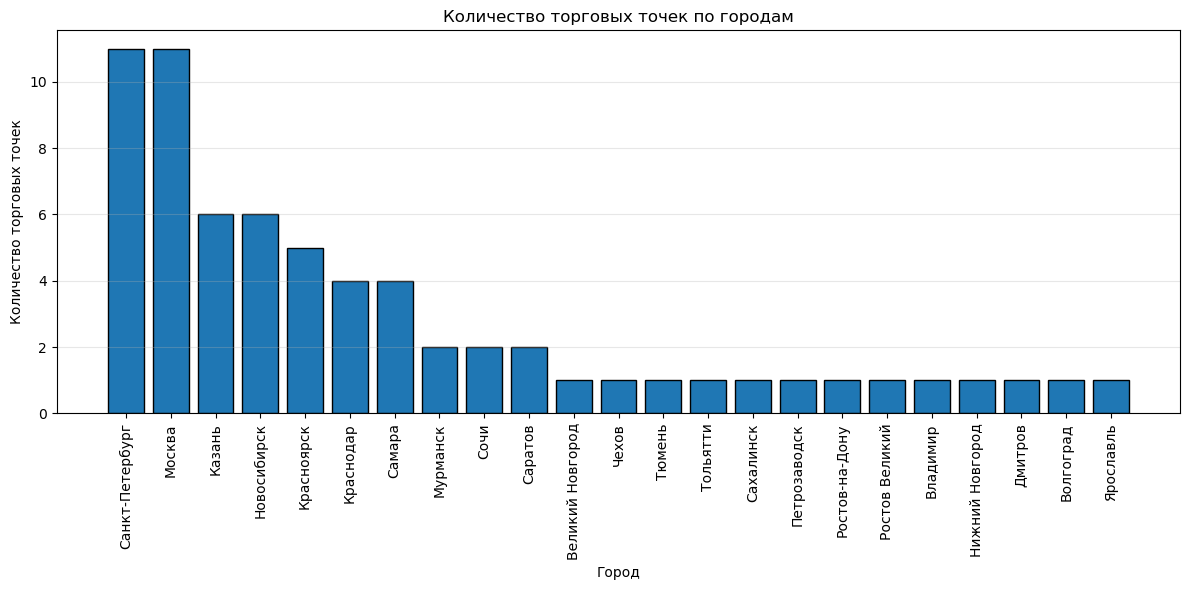

In [7]:
# Группировка торговых точек по городам (с сортировкой по убыванию количества ТТ)
city_counts = region_dict.groupby('city').agg(trading_point_count = ('id_trading_point', 'count')).reset_index()
city_counts = city_counts.sort_values(by = 'trading_point_count', ascending = False)
print("Количество торговых точек по городам (первые 5 строк):")
print(city_counts.head().to_string(index = False))

# Построение столбчатой диаграммы
plt.figure(figsize = (12, 6))
plt.bar(city_counts['city'], city_counts['trading_point_count'], edgecolor = 'black')
plt.xticks(rotation = 90)
plt.title('Количество торговых точек по городам')
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.grid(True, axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

Выводы:

1. Становление сети в СЗФО и ЦФО как ядро:
Аномально высокое количество ТТ в Санкт-Петербурге (11 ТТ при 5.4 млн чел., плотность 3,753 чел/км²) и ожидаемо большое количество ТТ в Москве (11 ТТ при 12.6 млн чел., плотность 4,920 чел/км²) указывает на их роль как исходных центров развития сети (с основанием, скорее всего, в Санкт-Петербурге).
Высокая покупательная способность (48,000 долл. ППС в Санкт-Петербурге и 50,000 долл. ППС в Москве) и компактная структура (131 км² и 233 км² на 1 ТТ соответственно) сделали эти города ключевыми рынками. Вместе СЗФО (15 ТТ) и ЦФО (16 ТТ) составляют 47% от общего числа ТТ, формируя ядро сети с сильным экономическим и демографическим потенциалом.

2. Стратегическое расширение через города-миллионники и туристические центры:
После освоения СЗФО и ЦФО сеть, очевидно, расширялась через крупные города-миллионники с высокой плотностью населения и доходами, такие как Казань (6 ТТ, 2,117 чел/км² и 40,000 долл. ППС), Новосибирск (6 ТТ, 3,227 чел/км² и 38,000 долл. ППС) и Краснодар (4 ТТ, 1,190 чел/км² и 35,000 долл. ППС), отдавая предпочтение компактным городам с эффективной транспортной доступностью (102–210 км² на 1 ТТ).
Туристические центры, такие как Сочи (2 ТТ, 2,557 чел/км² и 31,000 долл. ППС) и Санкт-Петербург, получили дополнительное количество ТТ благодаря повышенному спросу от туристов, что компенсирует меньшее постоянное население.

3. Гибридная стратегия с учётом конкуренции и логистики:
Сеть сочетает последовательное расширение от Санкт-Петербурга и Москвы со стратегическим охватом ключевых экономических узлов (например, Новосибирск как логистический центр для Сибири).
Ограниченное присутствие гипермаркетов в некоторых областях
ПФО, например, в Нижнем Новгороде (всего 1 ТТ на 1.22 млн чел., 2,976 чел/км² и 35,000 долл. ППС) или полное отсутствие в Республике Башкортостан (Уфа — 1.2 млн чел., 1,718 чел/км² и 35,000 долл. ППС), весьма ограниченное присутствие в УФО (1 ТТ в Тюмени, 820,000 чел., 1,175 чел/км² и 34,000 долл. ППС), скорее всего, объясняется высокой локальной конкуренцией (другие сети гипер- и супермаркетов, онлайн-торговля), сложностями логистики (удалённость от центральных складов) и возможными административными барьерами.

5. Адаптация к рыночным условиям и дальнейшее развитие:
Сеть демонстрирует гибкую стратегию, выбирая города с высоким демографическим и экономическим потенциалом (например, Казань, Новосибирск), а не строго географически последовательное расширение.
При этом сеть не отказывается тестировать рынок на новых и не самых очевидных для её текущего развития направлениях — открыв, например, 1 ТТ в ДФО (Сахалинск — 190,000 чел., 2,111 чел/км² и 30,000 долл. ППС), закладывая основу для будущего развития в регионе.

### 2. Объединение таблиц

Количество клиентов по числу платежей:
payment_count
1     22767
2      4460
3       939
4       118
5        69
6         7
7         5
8         5
9         8
10        5

Распределение количества платежей (payment_count):
count    28383.000000
mean         1.252863
std          0.596073
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000

Распределение суммы платежей (total_payment):
count    28383.000000
mean      4438.064933
std       2666.485215
min        498.000000
25%       2845.500000
50%       3835.000000
75%       5552.000000
max      43083.000000


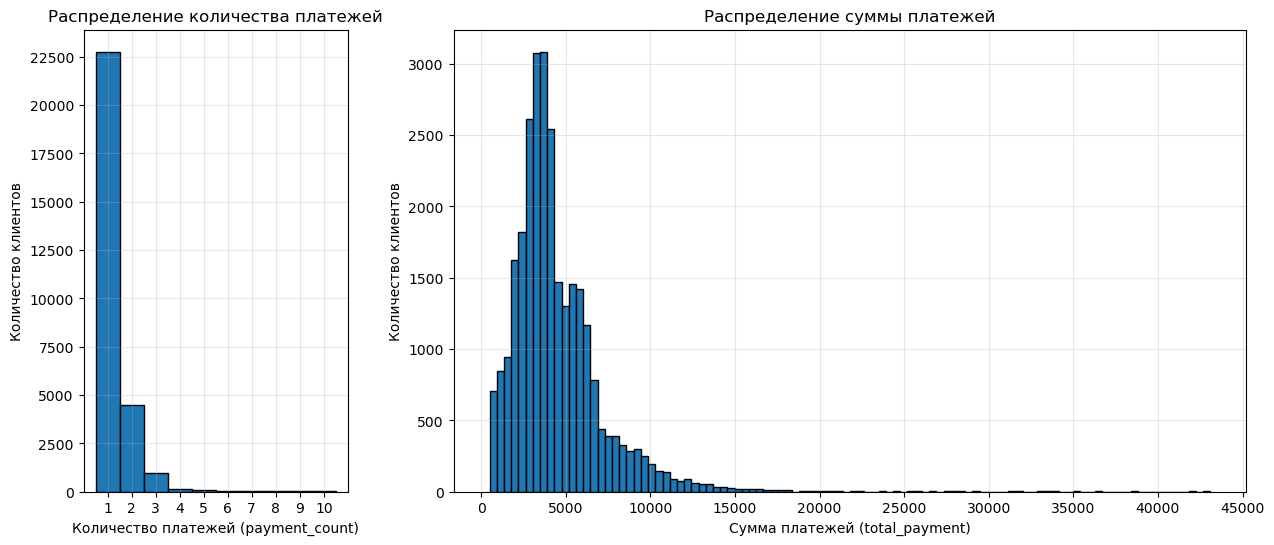

In [8]:
# Расчет суммы и количества платежей для каждого уникального клиента
client_totals = data.groupby('id_client').agg(total_payment = ('amt_payment', 'sum'), payment_count = ('amt_payment', 'count')).\
reset_index().sort_values(by = 'payment_count', ascending = False)

# Анализ распределения количества платежей
print("Количество клиентов по числу платежей:")
print(client_totals['payment_count'].value_counts().sort_index().to_string())
print("\nРаспределение количества платежей (payment_count):")
print(client_totals['payment_count'].describe().to_string())
# Анализ распределения суммы платежей
print("\nРаспределение суммы платежей (total_payment):")
print(client_totals['total_payment'].describe().to_string())

# Построение гистограмм:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6), gridspec_kw = {'width_ratios': [0.5, 1.5]})
# Количество платежей на одного уникального клиента
ax1.hist(client_totals['payment_count'], bins = range(1, client_totals['payment_count'].max() + 2), edgecolor = 'black', align = 'left')
ax1.set_title('Распределение количества платежей')
ax1.set_xlabel('Количество платежей (payment_count)')
ax1.set_ylabel('Количество клиентов')
ax1.set_yticks(range(0, 22501, 2500))  # деления по 2500
ax1.grid(True, alpha = 0.3)
ax1.set_xticks(range(1, client_totals['payment_count'].max() + 1))
# Сумма платежей на одного уникального клиента
ax2.hist(client_totals['total_payment'], bins = 100, edgecolor = 'black')
ax2.set_title('Распределение суммы платежей')
ax2.set_xlabel('Сумма платежей (total_payment)')
ax2.set_ylabel('Количество клиентов')
ax2.set_xticks(range(0, int(client_totals['total_payment'].max()) + 5001, 5000))  # деления по 5000
ax2.grid(True, alpha = 0.3)
plt.show()

In [9]:
# Объединение клиентской таблицы с таблицей с агрегированными платежами 
merged_data = clients.merge(client_totals[['id_client', 'total_payment']], on = 'id_client', how = 'left')
# выполнено левое соединение - сохранили всех клиентов из таблицы clients

# Вывод первых строк объединенной таблицы и проверки
print("Первые 3 строки объединённой таблицы:")
print(merged_data.head(3).to_string(index = False))
print(f"\nКоличество строк в clients: {len(clients)}")
print(f"Количество строк в merged_data: {len(merged_data)}")
print(f"Количество уникальных id_client в merged_data: {merged_data['id_client'].nunique()}")
# Проверка на потерю данных
if len(clients) == len(merged_data) == merged_data['id_client'].nunique():
    print("Вывод: объединение таблиц произведено без потерь данных")
else:
    print("Вывод: объединение таблиц произведено с потерями данных")

Первые 3 строки объединённой таблицы:
 id_client                dtime_ad  nflag_test  id_trading_point  total_payment
    180844 2022-06-08 18:38:41.414           0               212         5349.0
    226069 2022-07-11 16:28:38.511           1                54            NaN
    183981 2022-06-16 12:23:59.289           1               991         6322.0

Количество строк в clients: 55356
Количество строк в merged_data: 55356
Количество уникальных id_client в merged_data: 55356
Вывод: объединение таблиц произведено без потерь данных


In [10]:
# Заполнение нулей в total_payment для клиентов без покупок в clients
merged_data['total_payment'] = merged_data['total_payment'].fillna(0)

# Вывод первых строк таблицы для проверки замены NaN на ноль
print("Первые 3 строки объединённой таблицы после заполнения пустых значений нулями:")
print(merged_data.head(3).to_string(index = False))
print(f"\nКоличество клиентов с total_payment = 0: {len(merged_data[merged_data['total_payment'] == 0])}")

Первые 3 строки объединённой таблицы после заполнения пустых значений нулями:
 id_client                dtime_ad  nflag_test  id_trading_point  total_payment
    180844 2022-06-08 18:38:41.414           0               212         5349.0
    226069 2022-07-11 16:28:38.511           1                54            0.0
    183981 2022-06-16 12:23:59.289           1               991         6322.0

Количество клиентов с total_payment = 0: 26973


In [11]:
# Подтягивание города из словаря регионов к торговым точкам в merged_data
merged_data_with_cities = merged_data.merge(region_dict, on = 'id_trading_point', how = 'left')

# Переупорядочиваем столбцы, перемещая 'total_payment' перед 'id_trading_point'
merged_data_with_cities = merged_data_with_cities[['id_client', 'dtime_ad', 'nflag_test', 'total_payment', 'id_trading_point', 'city']]

# Вывод первых строк для проверки и контроль ключевых показателей датафрейма
print("Первые 3 строки объединённой таблицы с городами:")
print(merged_data_with_cities.head(3).to_string(index = False))
print(f"\nКоличество строк в merged_data_with_cities: {len(merged_data_with_cities)}")
print(f"Количество уникальных id_trading_point: {merged_data_with_cities['id_trading_point'].nunique()}")
print(f"Количество уникальных городов: {merged_data_with_cities['city'].nunique()}")

Первые 3 строки объединённой таблицы с городами:
 id_client                dtime_ad  nflag_test  total_payment  id_trading_point       city
    180844 2022-06-08 18:38:41.414           0         5349.0               212 Красноярск
    226069 2022-07-11 16:28:38.511           1            0.0                54   Мурманск
    183981 2022-06-16 12:23:59.289           1         6322.0               991     Казань

Количество строк в merged_data_with_cities: 55356
Количество уникальных id_trading_point: 66
Количество уникальных городов: 23


In [12]:
# Создание флага платежа
merged_data_with_cities['payment_flag'] = (merged_data_with_cities['total_payment'] > 0).astype(int)   # 1, если total_payment > 0, иначе 0

# Переупорядочиваем столбцы, перемещая payment_flag для удобства
merged_data_with_cities = merged_data_with_cities[['id_client', 'dtime_ad', 'nflag_test', 'total_payment', 'payment_flag', 'id_trading_point', 'city']]

# Вывод первых строк для проверки
print("Первые 3 строки объединённой таблицы с флагом платежа:")
print(merged_data_with_cities.head(3).to_string(index = False))

# Подсчёт клиентов с разными значениями флага платежа
count_payment_1 = len(merged_data_with_cities[merged_data_with_cities['payment_flag'] == 1])
share_payment_1 = (count_payment_1 / len(merged_data_with_cities) * 100)
count_payment_0 = len(merged_data_with_cities[merged_data_with_cities['payment_flag'] == 0])
share_payment_0 = (count_payment_0 / len(merged_data_with_cities) * 100)

print(f"\nКлиентов с payment_flag = 1:  количество = {count_payment_1}, доля = {share_payment_1:.2f}%")
print(f"Клиентов с payment_flag = 0:  количество = {count_payment_0}, доля = {share_payment_0:.2f}%")

Первые 3 строки объединённой таблицы с флагом платежа:
 id_client                dtime_ad  nflag_test  total_payment  payment_flag  id_trading_point       city
    180844 2022-06-08 18:38:41.414           0         5349.0             1               212 Красноярск
    226069 2022-07-11 16:28:38.511           1            0.0             0                54   Мурманск
    183981 2022-06-16 12:23:59.289           1         6322.0             1               991     Казань

Клиентов с payment_flag = 1:  количество = 28383, доля = 51.27%
Клиентов с payment_flag = 0:  количество = 26973, доля = 48.73%


### 3. Автоматизация статистических вычислений

In [13]:
# Создание функции test_calc для вычисления t-критерия и p_value для сравнения средних
def test_calc(r1, r2, alpha = 0.05):
    t_stat, p_value = ttest_ind(r1, r2)
    
    print(f"t-критерий: {t_stat:.4f}")
    print(f"p-value: {p_value:.2e}")
        
    if p_value < alpha:   # проверка гипотезы (H0: нет разницы между средними, H1: разница есть)
        print(f"p-value ({p_value:.2e}) < alpha ({alpha}), разница между средними статистически значима, гипотеза H0 отвергается.")
    else:
        print(f"p-value ({p_value:.2e}) >= alpha ({alpha}), разница между средними статистически не значима, гипотеза H0 подтверждается.")

    print("Средние значения рядов:  1) первый ряд =", round(r1.mean(), 4), 
      "  2) второй ряд =", round(r2.mean(), 4), 
      "  3) разница средних =", round(r1.mean() - r2.mean(), 4))

In [14]:
# Создание функции mann_whitney_func для расчета значения критерия Манна-Уитни (U-критерий) и p_value для сравнения распределений
def mann_whitney_func(r1, r2, alpha = 0.05):
    u_stat, p_value = mannwhitneyu(r1, r2, alternative = 'two-sided')   # проверяет, есть ли вообще разница между распределениями (в любую сторону)
    
    print(f"U-критерий: {u_stat:.4f}")
    print(f"p-value: {p_value:.2e}")
    
    if p_value < alpha:   # проверка гипотезы (H0: распределения одинаковы, H1: распределения различаются)
        print(f"p-value ({p_value:.2e}) < alpha ({alpha}), разница между распределениями статистически значима, гипотеза H0 отвергается.")
    else:
        print(f"p-value ({p_value:.2e}) >= alpha ({alpha}), разница между распределениями статистически не значима, гипотеза H0 подтверждается.")

### 4. Чистка неверно заполненных точек

In [15]:
# создаем цикл, выводящий все ТТ, в которых не было заплачено ни одного рубля ни одним клиентом
zero_payment_points = []

trading_points = merged_data_with_cities['id_trading_point'].unique()   # список всех уникальных ТТ

# Цикл по всем ТТ
for point in trading_points:
    point_data = merged_data_with_cities[merged_data_with_cities['id_trading_point'] == point]   # фильтруем данные для текущей ТТ
    if point_data['total_payment'].sum() == 0:    # проверяем, все ли платежи в конкретной ТТ равны 0
        zero_payment_points.append(point)

# Выводим список ТТ с нулевыми платежами
print("Торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом:", zero_payment_points)

Торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом: [26, 7, 23, 4, 1, 13]


In [16]:
# создаем цикл, выводящий все ТТ, в которых пустует или контрольная, или тестовая группа
empty_groups_points = []

# Цикл по всем ТТ
for point in trading_points:
    point_data = merged_data_with_cities[merged_data_with_cities['id_trading_point'] == point]   # фильтруем данные для текущей ТТ
    control_group = len(point_data[point_data['nflag_test'] == 0])   # проверяем наличие контрольной группы
    test_group = len(point_data[point_data['nflag_test'] == 1])   # проверяем наличие тестовой группы
    if control_group == 0 or test_group == 0:   # если хотя бы одна группа пуста, добавляем ТТ в список
        empty_groups_points.append(point)

# Выводим список ТТ с пустыми группами
print("Торговые точки, в которых пустует контрольная или тестовая группа:", empty_groups_points)

Торговые точки, в которых пустует контрольная или тестовая группа: [1015, 866, 1099, 739, 228, 603, 810, 800]


In [17]:
# создаем цикл, выводящий все ТТ, в которых все платежи равны 0 только в одной из групп
zero_group_payment_points = []

# Цикл по всем ТТ
for point in trading_points:
    point_data = merged_data_with_cities[merged_data_with_cities['id_trading_point'] == point]   # фильтруем данные для текущей ТТ
    avg_payment_control = point_data[point_data['nflag_test'] == 0]['total_payment'].mean()   # рассчитываем средние платежи по контрольной группе
    avg_payment_test = point_data[point_data['nflag_test'] == 1]['total_payment'].mean()   # рассчитываем средние платежи по тестовой группе
    
    # Проверяем, все ли платежи равны 0 только в одной группе
    if (pd.notna(avg_payment_control) and pd.notna(avg_payment_test) and
        ((avg_payment_control == 0 and avg_payment_test != 0) or (avg_payment_control != 0 and avg_payment_test == 0))):
        zero_group_payment_points.append(point)

# Выводим список ТТ с нулевыми платежами только в одной из групп
print("Торговые точки, в которых все платежи равны 0 только в одной из групп:", zero_group_payment_points)

Торговые точки, в которых все платежи равны 0 только в одной из групп: [46]


### 5. Расчет общих результатов A/B-теста

In [18]:
# Исключаем ТТ, в которых не было заплачено ни одного рубля ни одним клиентом, или те ТТ, в которых пустует контрольная или тестовая группа,
# или те ТТ, в которых все платежи равны 0 в одной из групп
points_to_exclude = list(set(zero_payment_points + empty_groups_points + zero_group_payment_points))  # объединяем списки ТТ для исключения (удаляем дубликаты через set)

# Фильтруем датафрейм, исключая ТТ из списка points_to_exclude
cleaned_data = merged_data_with_cities[~merged_data_with_cities['id_trading_point'].isin(points_to_exclude)]
remaining_points = cleaned_data['id_trading_point'].nunique()   # подсчитываем количество оставшихся торговых точек

# Выводим информацию об очищенном датафрейме
print("Количество записей:  1) до очистки =", len(merged_data_with_cities), "  2) после очистки =", len(cleaned_data),
      "  3) записей удалено =", len(merged_data_with_cities) - len(cleaned_data),
      "(", round((len(merged_data_with_cities) - len(cleaned_data)) / len(merged_data_with_cities) * 100, 2), "%)")
print("Удалено", len(points_to_exclude), "торговых точек:", ", ".join(map(str, points_to_exclude)), f". Осталось {remaining_points} торговых точек")

# Вычисляем удалённые и оставшиеся города
initial_cities = sorted(merged_data_with_cities['city'].unique())  # список всех городов до очистки
remaining_cities = sorted(cleaned_data['city'].unique())  # список оставшихся городов
removed_cities = sorted(list(set(initial_cities) - set(remaining_cities)))  # города, исключённые после очистки
print("Количество удаленных городов:", len(removed_cities), ", в т.ч. :", ", ".join(removed_cities))
print("Количество оставшихся городов:", len(remaining_cities), ", в т.ч. :", ", ".join(remaining_cities))  # информация о городах в очищенном датафрейме

Количество записей:  1) до очистки = 55356   2) после очистки = 45318   3) записей удалено = 10038 ( 18.13 %)
Удалено 15 торговых точек: 800, 1, 866, 739, 4, 228, 7, 810, 1099, 13, 46, 1015, 23, 26, 603 . Осталось 51 торговых точек
Количество удаленных городов: 8 , в т.ч. : Великий Новгород, Нижний Новгород, Новосибирск, Петрозаводск, Ростов Великий, Ростов-на-Дону, Чехов, Ярославль
Количество оставшихся городов: 15 , в т.ч. : Владимир, Волгоград, Дмитров, Казань, Краснодар, Красноярск, Москва, Мурманск, Самара, Санкт-Петербург, Саратов, Сахалинск, Сочи, Тольятти, Тюмень


Количество наблюдений в группе: 1) "контроль" = 22873  2) "тест" = 22445 . Разница между группами = 1.87%



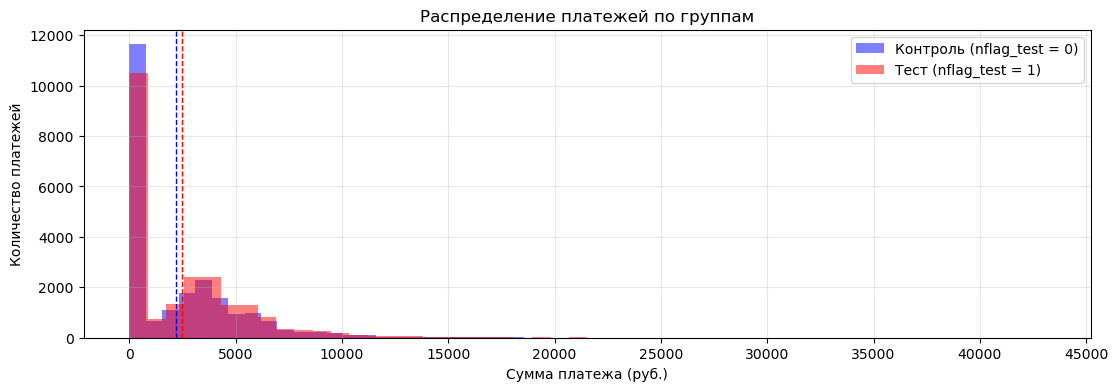

In [19]:
# Гистограмма платежей, с разделением по группам «тест» и «контроль»

# Фильтруем данные о платежах для контрольной и тестовой групп
control_payments = cleaned_data[cleaned_data['nflag_test'] == 0]['total_payment']
test_payments = cleaned_data[cleaned_data['nflag_test'] == 1]['total_payment']

# сравнение количества наблюдений в обеих группах (для понимания - требуется ли нормализация)
control_count = len(cleaned_data[cleaned_data['nflag_test'] == 0])
test_count = len(cleaned_data[cleaned_data['nflag_test'] == 1])
total_count = control_count + test_count     # Вычисляем разницу между группами
if control_count >= test_count:
    percentage_diff = round(((control_count - test_count) / control_count) * 100, 2)
else:
    percentage_diff = round(((test_count - control_count) / test_count) * 100, 2)
print(f"Количество наблюдений в группе: 1) \"контроль\" = {control_count}  2) \"тест\" = {test_count} . Разница между группами = {percentage_diff}%\n")

# Создаём гистограмму
plt.figure(figsize = (13, 4))
plt.hist(control_payments, bins = 50, alpha = 0.5, color = 'blue', label = 'Контроль (nflag_test = 0)')
plt.hist(test_payments, bins = 50, alpha = 0.5, color = 'red', label = 'Тест (nflag_test = 1)')
plt.axvline(control_payments.mean(), color = 'blue', linestyle = 'dashed', linewidth = 1)  # вертикальная линия для среднего значения группы "контроль"
plt.axvline(test_payments.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)   # вертикальная линия для среднего значения группы "тест"
plt.title('Распределение платежей по группам')
plt.xlabel('Сумма платежа (руб.)')
plt.ylabel('Количество платежей')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.xticks(range(0, int(max(control_payments.max(), test_payments.max())) + 5000, 5000))   # Устанавливаем интервалы на оси X с шагом 5000
plt.show()

In [20]:
# Применяем функцию test_calc для сравнения средних платежей обеих групп
test_calc(control_payments, test_payments)

t-критерий: -9.4568
p-value: 3.32e-21
p-value (3.32e-21) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 2189.1884   2) второй ряд = 2452.2773   3) разница средних = -263.0889


Вывод:
t-критерий (-9.4568) по модулю велик, что указывает на значительную разницу между группами. Отрицательное значение говорит о том, что среднее значение контрольной группы (2189.19 руб.) меньше, чем тестовой (2452.28 руб.), что подтверждается разницей средних (-263.09 руб.).
p-value (3.32e-21) < alpha (0.05) подтверждает статистическую значимость разницы между средними: H0 (средние равны) отвергается, H1 (средние различаются) принимается, что говорит о значимом эффекте A/B-теста.

Средние платежи в тестовой группе статистически значимо выше (на 263.09 руб.), чем в контрольной. p-value < 0.05 подтверждает неслучайность разницы, отвергая H0. Значит, изменения в тестовой группе положительно повлияли на сумму платежей. Разница в 263.09 руб. (12.0% от среднего контрольной группы) при 23,002 клиентах в тестовой группе даёт дополнительный доход 6,051,811 руб.

t-тест надёжен благодаря большим выборкам (23,402 и 23,002), даже если данные не совсем нормальны, но при сильной скошенности данных (много нулевых платежей и наблюдается длинный правый "хвост") стоит применить непараметрический тест (mann_whitney_func).

In [21]:
# Применяем функцию test_calc для сравнения конверсий в контрольной и тестовой группах

# Фильтруем данные о конверсии (0 = нет оплаты, 1 = оплата) 
control_conversion = cleaned_data[cleaned_data['nflag_test'] == 0]['payment_flag']
test_conversion = cleaned_data[cleaned_data['nflag_test'] == 1]['payment_flag']

# Применяем функцию test_calc
test_calc(control_conversion, test_conversion)

t-критерий: -9.2820
p-value: 1.73e-20
p-value (1.73e-20) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.4998   2) второй ряд = 0.5433   3) разница средних = -0.0435


Вывод:
t-критерий (-9.2820) по модулю велик, что указывает на значительную разницу в конверсии между группами. Отрицательное значение говорит о том, что среднее значение конверсии 0.4998 в контрольной группе (50.0% клиентов оплатили) меньше, чем 0.5433 в тестовой (54.3% клиентов оплатили), что подтверждается разницей средних -0.0435 (на 4.4 п.п. тестовая группа имеет более высокую конверсию).
p-value (1.73e-20) < alpha (0.05) подтверждает статистическую значимость разницы в конверсии между группами: H0 (конверсии равны) отвергается, H1 (конверсии различаются) принимается, что говорит о значимом эффекте A/B-теста на конверсию.

Конверсия в тестовой группе статистически значимо выше на 4.4 п.п., чем в контрольной. p-value < 0.05 подтверждает неслучайность разницы, отвергая H0. Изменения в тестовой группе положительно повлияли на конверсию в платеж. При 23,002 клиентах в тестовой группе это даёт дополнительно 1001 клиентов, совершивших оплату. При среднем платеже в 2452.28 руб. это даёт 2,454,732 руб. дополнительного дохода.

In [22]:
# Применяем функцию mann_whitney_func для сравнения средних платежей обеих групп
mann_whitney_func(control_payments, test_payments)

U-критерий: 243344369.0000
p-value: 3.01e-24
p-value (3.01e-24) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.


Выводы:
U-критерий (243,344,369.0) отражает различия в распределениях двух выборок и зависит от размеров выборок (23,402 и 23,002), хотя само значение U-критерия и не интерпретируется напрямую, а используется для расчёта p-value.
p-value (3.01e-24) < alpha (0.05) подтверждает, что распределения платежей в контрольной и тестовой группах статистически значимо различаются: H0 (распределения платежей равны) отвергается, H1 (распределения различаются) принимается, что говорит о значимом эффекте A/B-теста на распределение платежей.

Тест Манна-Уитни надёжен для больших выборок (23,402 и 23,002) и не требует нормальности данных, что делает его подходящим при сильной скошенности данных (много нулевых платежей и длинный правый "хвост").
t-тест ранее показал t-критерий -9.4568 и p-value 3.32e-21, что также указывало на значимость. Тест Манна-Уитни подтверждает этот результат, различие в p-value незначительно и связано с разными методами.

In [23]:
# Применяем функцию mann_whitney_func для сравнения конверсий в контрольной и тестовой группах
mann_whitney_func(control_conversion, test_conversion)

U-критерий: 245519959.0000
p-value: 1.80e-20
p-value (1.80e-20) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.


Выводы:
p-value (1.80e-20) < alpha (0.05) подтверждает, что распределения конверсий в контрольной и тестовой группах статистически значимо различаются: H0 (распределения конверсий в обеих группах одинаковы) отвергается, H1 (распределения различаются) принимается, что говорит о значимом эффекте A/B-теста на конверсию.

t-тест ранее показал t-критерий -9.2820 и p-value 1.73e-20, что также указывало на значимость. Тест Манна-Уитни подтверждает этот результат.

### 6. Сегментация результатов A/B-теста

Количество наблюдений в группе: 1) "контроль" = 6224  2) "тест" = 6134 . Разница между группами = 1.45%



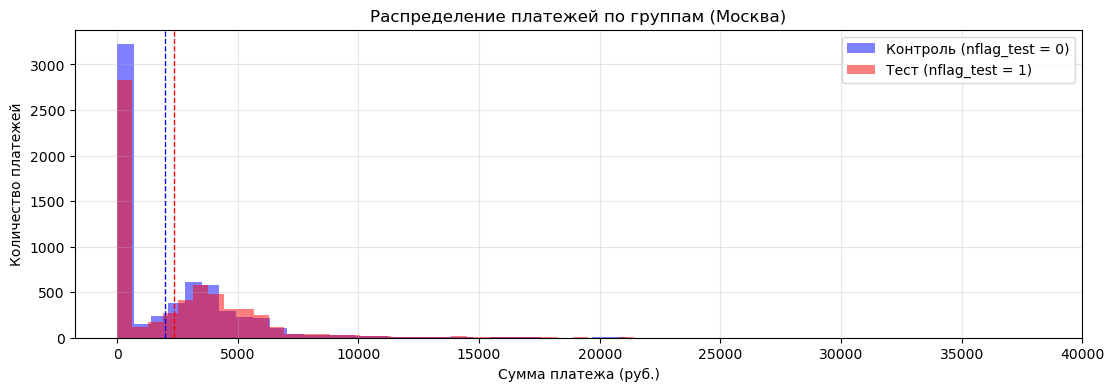

In [24]:
# Гистограмма платежей в Москве с разделением по группам "тест" и "контроль"

# Фильтруем данные о платежах для контрольной и тестовой групп в Москве
moscow_control_payments = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Москва')]['total_payment']
moscow_test_payments = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Москва')]['total_payment']

# Сравнение количества наблюдений в обеих группах (для понимания - требуется ли нормализация)
control_count_moscow = len(moscow_control_payments)
test_count_moscow = len(moscow_test_payments)
if control_count_moscow >= test_count_moscow:
    percentage_diff_moscow = round(((control_count_moscow - test_count_moscow) / control_count_moscow) * 100, 2)
else:
    percentage_diff_moscow = round(((test_count_moscow - control_count_moscow) / test_count_moscow) * 100, 2)
print(f"Количество наблюдений в группе: 1) \"контроль\" = {control_count_moscow}  2) \"тест\" = {test_count_moscow} . Разница между группами = {percentage_diff_moscow}%\n")

# Создаём гистограмму
plt.figure(figsize = (13, 4))
plt.hist(moscow_control_payments, bins = 50, alpha = 0.5, color = 'blue', label = 'Контроль (nflag_test = 0)')
plt.hist(moscow_test_payments, bins = 50, alpha = 0.5, color = 'red', label = 'Тест (nflag_test = 1)')
plt.axvline(moscow_control_payments.mean(), color = 'blue', linestyle = 'dashed', linewidth = 1)  # Вертикальная линия для среднего значения группы "контроль"
plt.axvline(moscow_test_payments.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)   # Вертикальная линия для среднего значения группы "тест"
plt.title('Распределение платежей по группам (Москва)')
plt.xlabel('Сумма платежа (руб.)')
plt.ylabel('Количество платежей')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.xticks(range(0, int(max(moscow_control_payments.max(), moscow_test_payments.max())) + 5000, 5000))  # Устанавливаем интервалы на оси X с шагом 5000
plt.show()

In [25]:
# Анализ платежей и конверсии в Москве с использованием test_calc и mann_whitney_func

# Фильтруем данные по Москве для контрольной и тестовой групп
moscow_control_payments = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Москва')]['total_payment']
moscow_test_payments = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Москва')]['total_payment']
moscow_control_conversion = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Москва')]['payment_flag']
moscow_test_conversion = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Москва')]['payment_flag']

# Анализ платежей
print("Анализ платежей в Москве:")
print("1.Результаты t-теста для платежей:")
test_calc(moscow_control_payments, moscow_test_payments)
print("2.Результаты теста Манна-Уитни для платежей:")
mann_whitney_func(moscow_control_payments, moscow_test_payments)

# Анализ конверсии
print("\nАнализ конверсии в Москве:")
print("1. Результаты t-теста для конверсии:")
test_calc(moscow_control_conversion, moscow_test_conversion)
print("2. Результаты теста Манна-Уитни для конверсии:")
mann_whitney_func(moscow_control_conversion, moscow_test_conversion)

Анализ платежей в Москве:
1.Результаты t-теста для платежей:
t-критерий: -7.6765
p-value: 1.76e-14
p-value (1.76e-14) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 1986.1806   2) второй ряд = 2367.9591   3) разница средних = -381.7785
2.Результаты теста Манна-Уитни для платежей:
U-критерий: 17582441.5000
p-value: 7.01e-16
p-value (7.01e-16) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Москве:
1. Результаты t-теста для конверсии:
t-критерий: -6.1903
p-value: 6.19e-10
p-value (6.19e-10) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.4879   2) второй ряд = 0.5435   3) разница средних = -0.0556
2. Результаты теста Манна-Уитни для конверсии:
U-критерий: 18028079.0000
p-value: 6.37e-10
p-value (6.37e-10) < alpha (0.05), разница между распределениями статистическ

1. Выводы по платежам в Москве:

t-критерий (-7.6765) по модулю велик, что указывает на значительную разницу между группами. Отрицательное значение говорит о том, что среднее значение контрольной группы (1986.18 руб.) меньше, чем тестовой (2367.96 руб.), разница = -381.78 руб. p-value (1.76e-14) < alpha (0.05) подтверждает статистическую значимость: H0 (средние равны) отвергается, H1 (средние различаются) принимается, что говорит о значимом эффекте A/B-теста.

U-критерий (17,582,441.5) и p-value (7.01e-16) < alpha (0.05) подтверждают, что распределения платежей в контрольной и тестовой группах значимо различаются: H0 (распределения равны) отвергается, H1 (распределения различаются) принимается, что подтверждает эффект A/B-теста.

Оба теста надёжны для выборок (6224 и 6134), при этом тест Манна-Уитни не требует нормальности данных и подходит при сильной скошенности (много нулевых платежей и длинный правый "хвост"). Различие в p-value (1.76e-14 против 7.01e-16) несущественно в ключе нашего анализа, и связано с разными методами.
Разница в платежах составляет 381.78 руб. (19.2% от среднего контрольной группы), что при 6134 клиентах в тестовой группе даёт дополнительный доход 2,341,798 руб.

2. Выводы по конверсиям в Москве:

t-критерий (-6.1903) по модулю велик, что указывает на значительную разницу в конверсии между группами. Отрицательное значение говорит о том, что среднее значение конверсии 0.4879 в контрольной группе (48.79% клиентов оплатили) меньше, чем 0.5435 в тестовой (54.35% клиентов оплатили), разница = -0.0556 (тестовая группа выше на 5.56 п.п.). p-value (6.19e-10) < alpha (0.05) подтверждает статистическую значимость: H0 (конверсии равны) отвергается, H1 (конверсии различаются) принимается, что говорит о значимом эффекте A/B-теста.

В тесте Манна-Уитни p-value (6.37e-10) < alpha (0.05) подтверждает, что распределения конверсий в контрольной и тестовой группах значимо различаются: H0 (распределения равны) отвергается, H1 (распределения различаются) принимается, что подтверждает эффект A/B-теста.

Различие в p-value (6.19e-10 против 6.37e-10) двух видов тестов несущественно в ключе нашего анализа, и связано с разными методами.
Разница в конверсии составляет 5.56 п.п., что при 6134 клиентах в тестовой группе даёт дополнительно 341 клиента, что при среднем платеже в 2367.96 руб. даёт 807,474 руб. дополнительного дохода.

3. Сравнение с общими результатами (по всем городам):

Общий анализ выявил разницу в платежах -263.09 руб. (12.0%) и в конверсии -4.4 п.п. В Москве эффект более выраженный: разница в платежах -381.78 руб. (19.2%), в конверсии -5.56 п.п., что говорит о более выраженном воздействии изменений в этом городе.

Количество наблюдений в группе: 1) "контроль" = 4434  2) "тест" = 4445 . Разница между группами = 0.25%



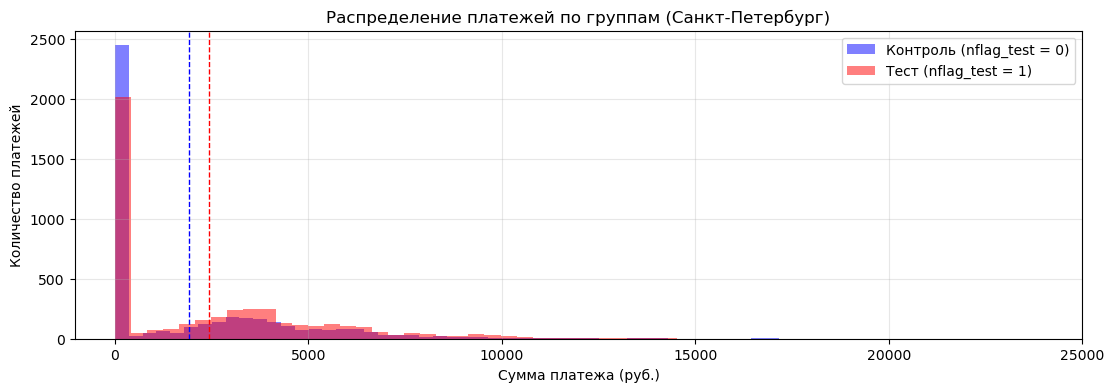

In [26]:
# Гистограмма платежей в Санкт-Петербурге с разделением по группам "тест" и "контроль"

# Фильтруем данные о платежах для контрольной и тестовой групп в Санкт-Петербурге
spb_control_payments = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Санкт-Петербург')]['total_payment']
spb_test_payments = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Санкт-Петербург')]['total_payment']

# Сравнение количества наблюдений в обеих группах (для понимания - требуется ли нормализация)
control_count_spb = len(spb_control_payments)
test_count_spb = len(spb_test_payments)
if control_count_spb >= test_count_spb:
    percentage_diff_spb = round(((control_count_spb - test_count_spb) / control_count_spb) * 100, 2)
else:
    percentage_diff_spb = round(((test_count_spb - control_count_spb) / test_count_spb) * 100, 2)
print(f"Количество наблюдений в группе: 1) \"контроль\" = {control_count_spb}  2) \"тест\" = {test_count_spb} . Разница между группами = {percentage_diff_spb}%\n")

# Создаём гистограмму
plt.figure(figsize = (13, 4))
plt.hist(spb_control_payments, bins = 50, alpha = 0.5, color = 'blue', label = 'Контроль (nflag_test = 0)')
plt.hist(spb_test_payments, bins = 50, alpha = 0.5, color = 'red', label = 'Тест (nflag_test = 1)')
plt.axvline(spb_control_payments.mean(), color = 'blue', linestyle = 'dashed', linewidth = 1)  # Вертикальная линия для среднего значения группы "контроль"
plt.axvline(spb_test_payments.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)   # Вертикальная линия для среднего значения группы "тест"
plt.title('Распределение платежей по группам (Санкт-Петербург)')
plt.xlabel('Сумма платежа (руб.)')
plt.ylabel('Количество платежей')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.xticks(range(0, int(max(spb_control_payments.max(), spb_test_payments.max())) + 5000, 5000))  # Устанавливаем интервалы на оси X с шагом 5000
plt.show()

In [27]:
# Анализ платежей и конверсии в Санкт-Петербурге с использованием test_calc и mann_whitney_func

# Фильтруем данные по Санкт-Петербургу для контрольной и тестовой групп
spb_control_payments = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Санкт-Петербург')]['total_payment']
spb_test_payments = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Санкт-Петербург')]['total_payment']
spb_control_conversion = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == 'Санкт-Петербург')]['payment_flag']
spb_test_conversion = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == 'Санкт-Петербург')]['payment_flag']

# Анализ платежей
print("Анализ платежей в Санкт-Петербурге:")
print("1.Результаты t-теста для платежей:")
test_calc(spb_control_payments, spb_test_payments)
print("2.Результаты теста Манна-Уитни для платежей:")
mann_whitney_func(spb_control_payments, spb_test_payments)

# Анализ конверсии
print("\nАнализ конверсии в Санкт-Петербурге:")
print("1. Результаты t-теста для конверсии:")
test_calc(spb_control_conversion, spb_test_conversion)
print("2. Результаты теста Манна-Уитни для конверсии:")
mann_whitney_func(spb_control_conversion, spb_test_conversion)

Анализ платежей в Санкт-Петербурге:
1.Результаты t-теста для платежей:
t-критерий: -8.7596
p-value: 2.32e-18
p-value (2.32e-18) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 1913.5586   2) второй ряд = 2427.4625   3) разница средних = -513.9039
2.Результаты теста Манна-Уитни для платежей:
U-критерий: 8809444.5000
p-value: 2.04e-20
p-value (2.04e-20) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Санкт-Петербурге:
1. Результаты t-теста для конверсии:
t-критерий: -9.3525
p-value: 1.07e-20
p-value (1.07e-20) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.4484   2) второй ряд = 0.5471   3) разница средних = -0.0988
2. Результаты теста Манна-Уитни для конверсии:
U-критерий: 8881151.0000
p-value: 1.31e-20
p-value (1.31e-20) < alpha (0.05), разница между распределе

1. Выводы по платежам в Санкт-Петербурге:

t-критерий (-8.7596) по модулю велик, что указывает на значительную разницу между группами. Отрицательное значение говорит о том, что среднее значение контрольной группы (1913.56 руб.) меньше, чем тестовой (2427.46 руб.), разница = -513.90 руб. p-value (2.32e-18) < alpha (0.05) подтверждает статистическую значимость: H0 (средние равны) отвергается, H1 (средние различаются) принимается, что говорит о значимом эффекте A/B-теста.

U-критерий (8,809,444.5) и p-value (2.04e-20) < alpha (0.05) подтверждают, что распределения платежей в контрольной и тестовой группах значимо различаются: H0 (распределения равны) отвергается, H1 (распределения различаются) принимается, что подтверждает эффект A/B-теста.

Оба теста надёжны для выборок (4434 и 4445), при этом тест Манна-Уитни не требует нормальности данных и подходит при сильной скошенности (много нулевых платежей и длинный правый "хвост"). Различие в p-value (2.32e-18 против 2.04e-20) несущественно в ключе нашего анализа, и связано с разными методами. Разница в платежах составляет 513.90 руб. (26.9% от среднего контрольной группы), что при 4445 клиентах в тестовой группе даёт дополнительный доход 2,284,670 руб.

2. Выводы по конверсиям в Санкт-Петербурге:

t-критерий (-9.3525) по модулю велик, что указывает на значительную разницу в конверсии между группами. Отрицательное значение говорит о том, что среднее значение конверсии 0.4484 в контрольной группе (44.84% клиентов оплатили) меньше, чем 0.5471 в тестовой (54.71% клиентов оплатили), разница = -0.0988 (тестовая группа выше на 9.88 п.п.). p-value (1.07e-20) < alpha (0.05) подтверждает статистическую значимость: H0 (конверсии равны) отвергается, H1 (конверсии различаются) принимается, что говорит о значимом эффекте A/B-теста.

В тесте Манна-Уитни p-value (1.31e-20) < alpha (0.05) подтверждает, что распределения конверсий в контрольной и тестовой группах значимо различаются: H0 (распределения равны) отвергается, H1 (распределения различаются) принимается, что подтверждает эффект A/B-теста.

Различие в p-value (1.07e-20 против 1.31e-20) двух видов тестов несущественно в ключе нашего анализа, и связано с разными методами. Разница в конверсии составляет 9.88 п.п., что при 4445 клиентах в тестовой группе даёт дополнительно 439 клиента, что при среднем платеже в 2427.46 руб. даёт 1,065,434 руб. дополнительного дохода.

3. Сравнение с общими результатами (по всем городам):

Общий анализ выявил разницу в платежах -263.09 руб. (12.0%) и в конверсии -4.4 п.п. В Санкт-Петербурге эффект сильнее: разница в платежах -513.90 руб. (26.9%), в конверсии -9.88 п.п., что говорит о более выраженном воздействии изменений в этом городе.


=== Анализ для города: Красноярск ===

Построение гистограммы для Красноярск:


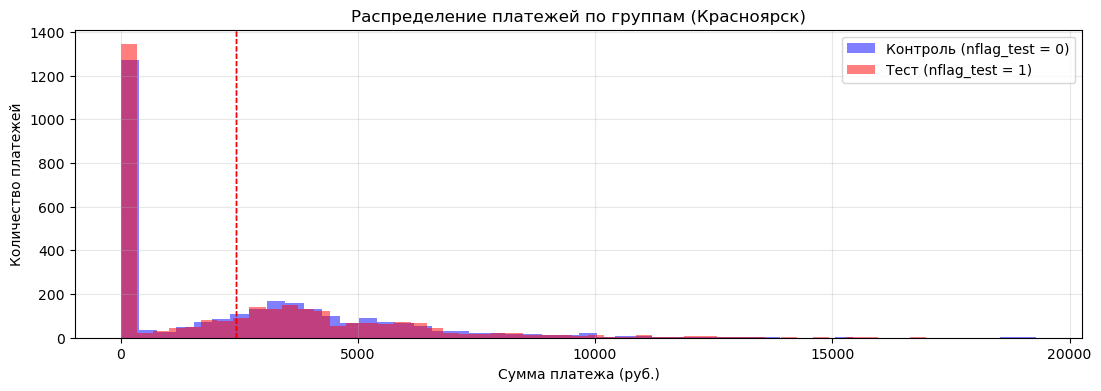


Количество наблюдений в группе: 1) "контроль" = 2900  2) "тест" = 3037 . Разница между группами = 4.51%

Анализ платежей в Красноярск:
1. Результаты t-теста для платежей:
t-критерий: -0.1200
p-value: 9.04e-01
p-value (9.04e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2428.7776   2) второй ряд = 2437.4959   3) разница средних = -8.7183
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 4413418.0000
p-value: 8.77e-01
p-value (8.77e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Красноярск:
1. Результаты t-теста для конверсии:
t-критерий: 0.2786
p-value: 7.81e-01
p-value (7.81e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.5614   2) второй ряд = 0.5578   3) разница средних = 0.0036
2. Результаты теста Манна-Уитни для 

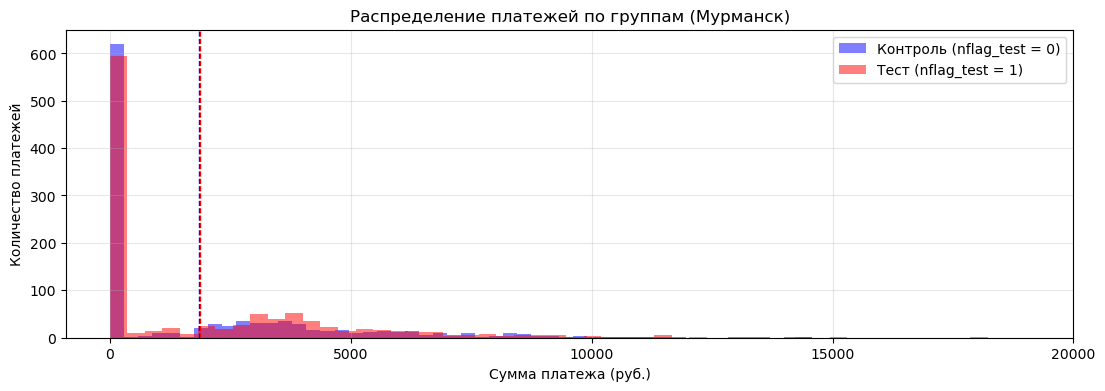


Количество наблюдений в группе: 1) "контроль" = 1065  2) "тест" = 1055 . Разница между группами = 0.94%

Анализ платежей в Мурманск:
1. Результаты t-теста для платежей:
t-критерий: -0.0690
p-value: 9.45e-01
p-value (9.45e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 1857.2197   2) второй ряд = 1865.2711   3) разница средних = -8.0514
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 554067.5000
p-value: 5.43e-01
p-value (5.43e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Мурманск:
1. Результаты t-теста для конверсии:
t-критерий: -0.8460
p-value: 3.98e-01
p-value (3.98e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.4188   2) второй ряд = 0.437   3) разница средних = -0.0182
2. Результаты теста Манна-Уитни для конв

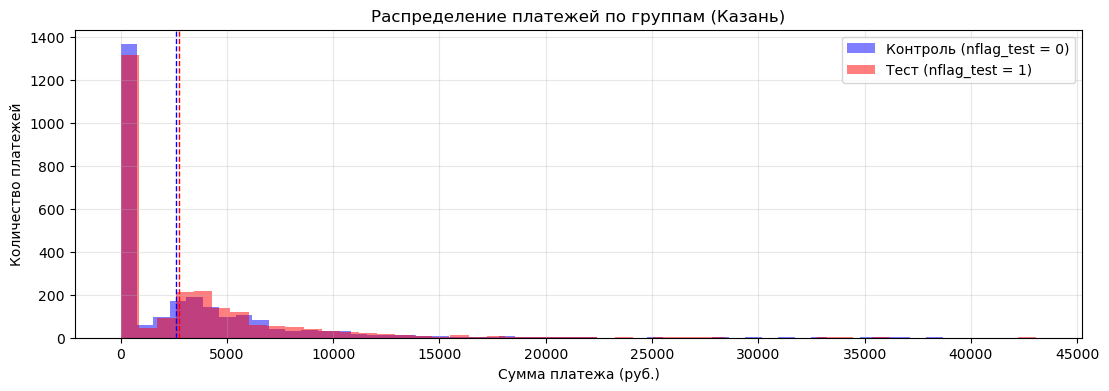


Количество наблюдений в группе: 1) "контроль" = 2577  2) "тест" = 2500 . Разница между группами = 2.99%

Анализ платежей в Казань:
1. Результаты t-теста для платежей:
t-критерий: -1.0655
p-value: 2.87e-01
p-value (2.87e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2610.6884   2) второй ряд = 2731.9132   3) разница средних = -121.2248
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 3178575.0000
p-value: 3.77e-01
p-value (3.77e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Казань:
1. Результаты t-теста для конверсии:
t-критерий: -0.2730
p-value: 7.85e-01
p-value (7.85e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.475   2) второй ряд = 0.4788   3) разница средних = -0.0038
2. Результаты теста Манна-Уитни для конве

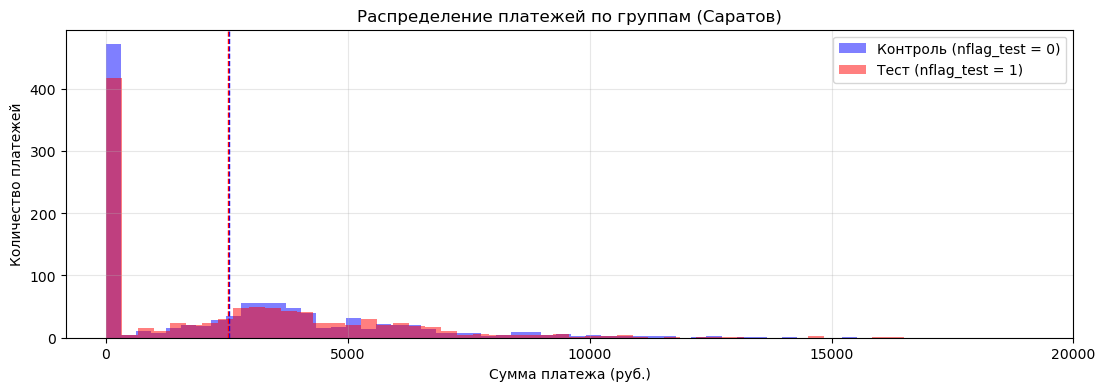


Количество наблюдений в группе: 1) "контроль" = 1109  2) "тест" = 1013 . Разница между группами = 8.66%

Анализ платежей в Саратов:
1. Результаты t-теста для платежей:
t-критерий: 0.1052
p-value: 9.16e-01
p-value (9.16e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2541.6456   2) второй ряд = 2528.7887   3) разница средних = 12.8569
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 557976.5000
p-value: 7.83e-01
p-value (7.83e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Саратов:
1. Результаты t-теста для конверсии:
t-критерий: -0.6508
p-value: 5.15e-01
p-value (5.15e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.5744   2) второй ряд = 0.5884   3) разница средних = -0.014
2. Результаты теста Манна-Уитни для конверс

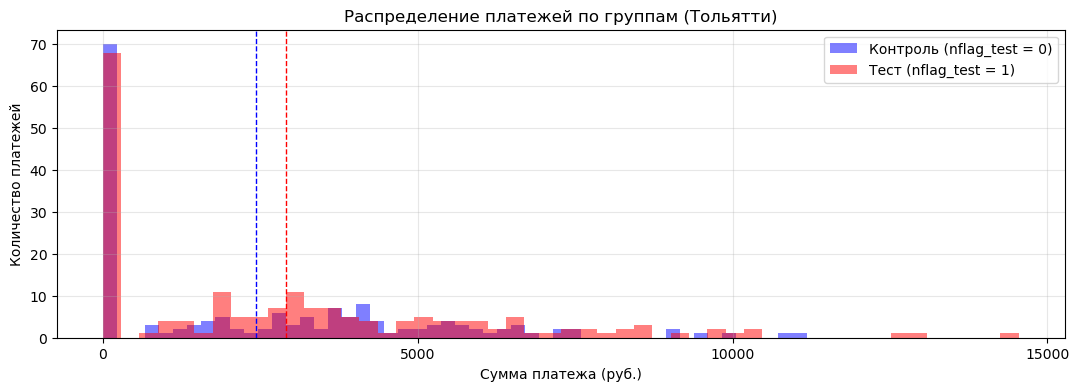


Количество наблюдений в группе: 1) "контроль" = 167  2) "тест" = 190 . Разница между группами = 12.11%

Анализ платежей в Тольятти:
1. Результаты t-теста для платежей:
t-критерий: -1.5046
p-value: 1.33e-01
p-value (1.33e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2439.4611   2) второй ряд = 2902.4105   3) разница средних = -462.9494
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 14709.5000
p-value: 2.21e-01
p-value (2.21e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Тольятти:
1. Результаты t-теста для конверсии:
t-критерий: -1.1851
p-value: 2.37e-01
p-value (2.37e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.5808   2) второй ряд = 0.6421   3) разница средних = -0.0613
2. Результаты теста Манна-Уитни для кон

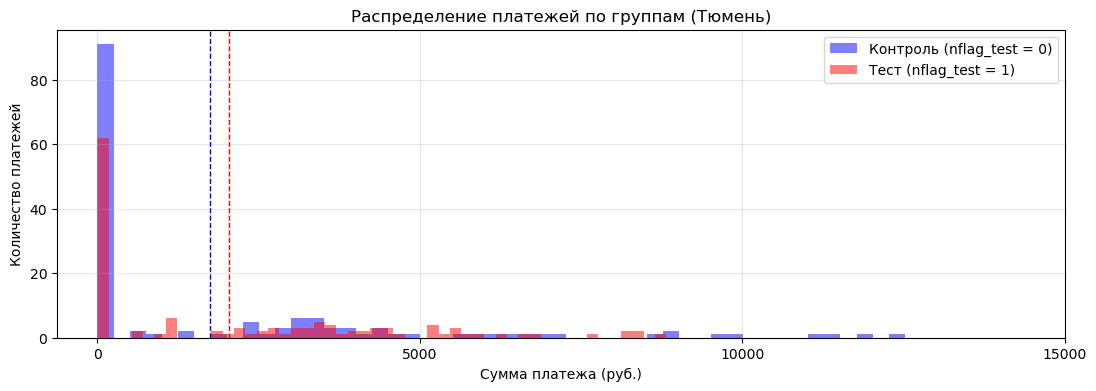


Количество наблюдений в группе: 1) "контроль" = 146  2) "тест" = 130 . Разница между группами = 10.96%

Анализ платежей в Тюмень:
1. Результаты t-теста для платежей:
t-критерий: -0.9265
p-value: 3.55e-01
p-value (3.55e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 1743.3767   2) второй ряд = 2043.8231   3) разница средних = -300.4464
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 8239.0000
p-value: 3.81e-02
p-value (3.81e-02) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Тюмень:
1. Результаты t-теста для конверсии:
t-критерий: -2.4598
p-value: 1.45e-02
p-value (1.45e-02) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.3767   2) второй ряд = 0.5231   3) разница средних = -0.1464
2. Результаты теста Манна-Уитни для конверсии:
U-критерий:

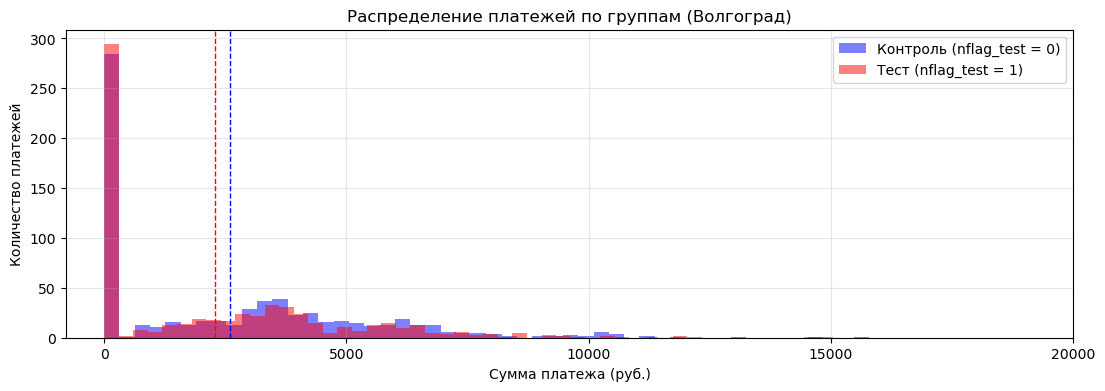


Количество наблюдений в группе: 1) "контроль" = 703  2) "тест" = 657 . Разница между группами = 6.54%

Анализ платежей в Волгоград:
1. Результаты t-теста для платежей:
t-критерий: 2.0893
p-value: 3.69e-02
p-value (3.69e-02) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 2601.761   2) второй ряд = 2288.8706   3) разница средних = 312.8904
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 245743.0000
p-value: 3.32e-02
p-value (3.32e-02) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Волгоград:
1. Результаты t-теста для конверсии:
t-критерий: 1.6222
p-value: 1.05e-01
p-value (1.05e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.596   2) второй ряд = 0.5525   3) разница средних = 0.0435
2. Результаты теста Манна-Уитни для конверсии:
U-критерий

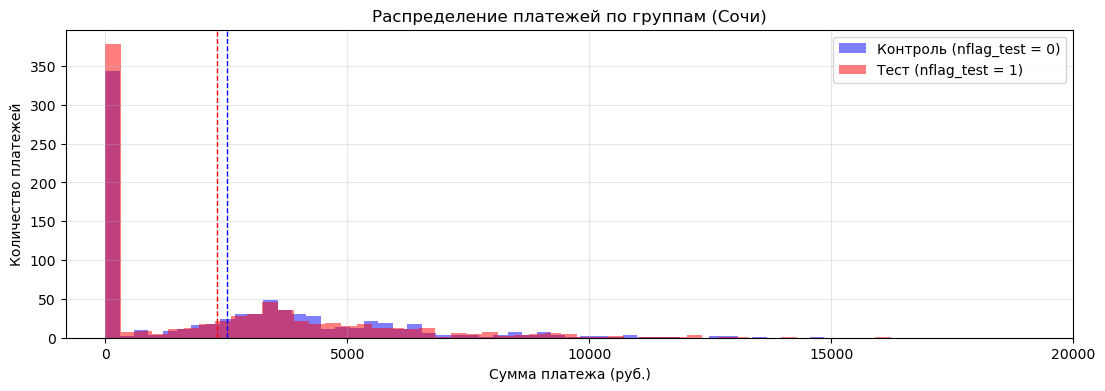


Количество наблюдений в группе: 1) "контроль" = 806  2) "тест" = 796 . Разница между группами = 1.24%

Анализ платежей в Сочи:
1. Результаты t-теста для платежей:
t-критерий: 1.5432
p-value: 1.23e-01
p-value (1.23e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2523.0819   2) второй ряд = 2305.8304   3) разница средних = 217.2515
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 337587.5000
p-value: 5.70e-02
p-value (5.70e-02) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Сочи:
1. Результаты t-теста для конверсии:
t-критерий: 1.9850
p-value: 4.73e-02
p-value (4.73e-02) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.5744   2) второй ряд = 0.5251   3) разница средних = 0.0493
2. Результаты теста Манна-Уитни для конверсии:
U-критерий:

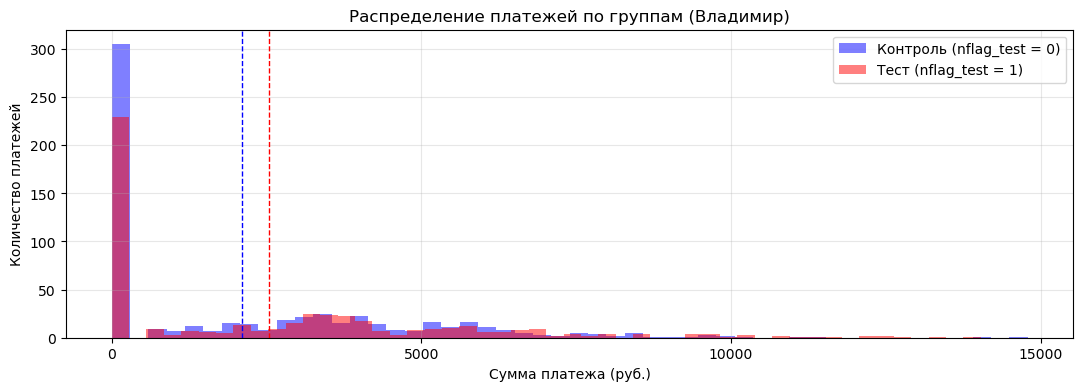


Количество наблюдений в группе: 1) "контроль" = 608  2) "тест" = 509 . Разница между группами = 16.28%

Анализ платежей в Владимир:
1. Результаты t-теста для платежей:
t-критерий: -2.5770
p-value: 1.01e-02
p-value (1.01e-02) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 2108.6102   2) второй ряд = 2547.22   3) разница средних = -438.6098
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 143847.0000
p-value: 3.17e-02
p-value (3.17e-02) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Владимир:
1. Результаты t-теста для конверсии:
t-критерий: -1.7249
p-value: 8.48e-02
p-value (8.48e-02) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.4984   2) второй ряд = 0.5501   3) разница средних = -0.0517
2. Результаты теста Манна-Уитни для конверсии:
U-крите

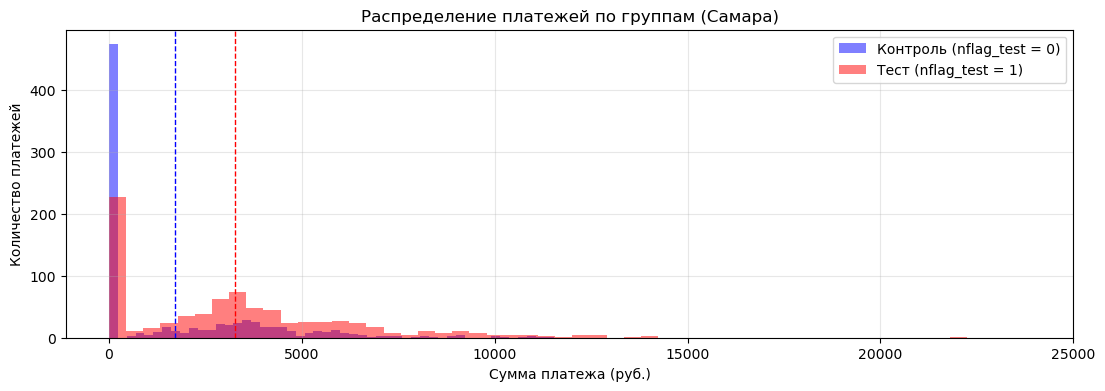


Количество наблюдений в группе: 1) "контроль" = 846  2) "тест" = 802 . Разница между группами = 5.2%

Анализ платежей в Самара:
1. Результаты t-теста для платежей:
t-критерий: -11.5408
p-value: 1.10e-29
p-value (1.10e-29) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 1718.4173   2) второй ряд = 3262.7893   3) разница средних = -1544.372
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 233516.5000
p-value: 4.33e-30
p-value (4.33e-30) < alpha (0.05), разница между распределениями статистически значима, гипотеза H0 отвергается.

Анализ конверсии в Самара:
1. Результаты t-теста для конверсии:
t-критерий: -11.8462
p-value: 3.98e-31
p-value (3.98e-31) < alpha (0.05), разница между средними статистически значима, гипотеза H0 отвергается.
Средние значения рядов:  1) первый ряд = 0.4397   2) второй ряд = 0.717   3) разница средних = -0.2772
2. Результаты теста Манна-Уитни для конверсии:
U-критерий: 24519

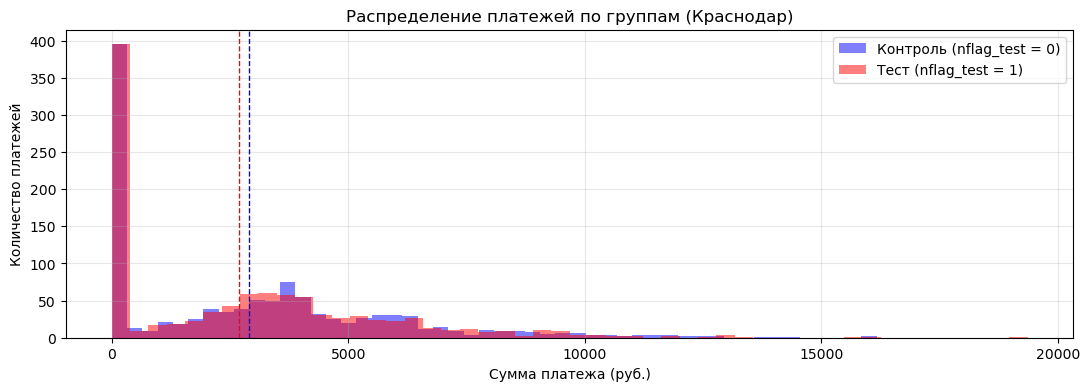


Количество наблюдений в группе: 1) "контроль" = 1139  2) "тест" = 1024 . Разница между группами = 10.1%

Анализ платежей в Краснодар:
1. Результаты t-теста для платежей:
t-критерий: 1.7188
p-value: 8.58e-02
p-value (8.58e-02) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 2912.4311   2) второй ряд = 2696.8047   3) разница средних = 215.6264
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 609837.0000
p-value: 5.94e-02
p-value (5.94e-02) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Краснодар:
1. Результаты t-теста для конверсии:
t-критерий: 1.8790
p-value: 6.04e-02
p-value (6.04e-02) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.6532   2) второй ряд = 0.6143   3) разница средних = 0.0389
2. Результаты теста Манна-Уитни для кон

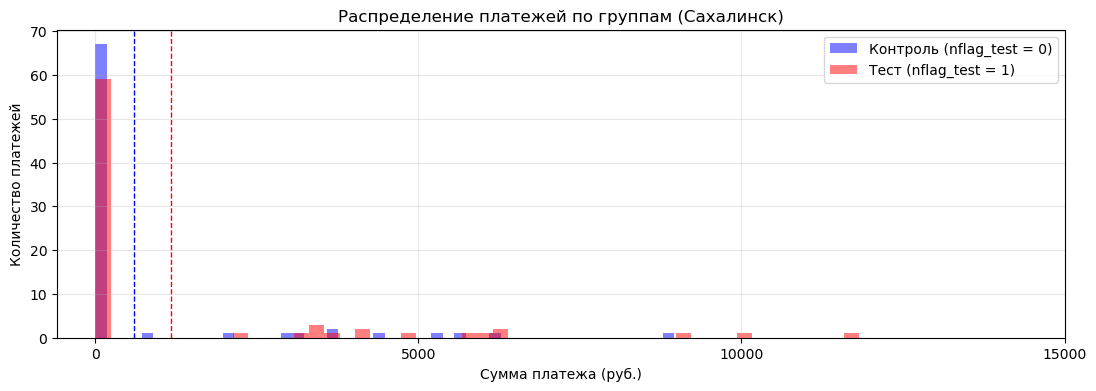


Количество наблюдений в группе: 1) "контроль" = 78  2) "тест" = 75 . Разница между группами = 3.85%

Анализ платежей в Сахалинск:
1. Результаты t-теста для платежей:
t-критерий: -1.6271
p-value: 1.06e-01
p-value (1.06e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 600.1538   2) второй ряд = 1171.4533   3) разница средних = -571.2995
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 2690.5000
p-value: 1.99e-01
p-value (1.99e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Сахалинск:
1. Результаты t-теста для конверсии:
t-критерий: -1.1704
p-value: 2.44e-01
p-value (2.44e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.141   2) второй ряд = 0.2133   3) разница средних = -0.0723
2. Результаты теста Манна-Уитни для конверс

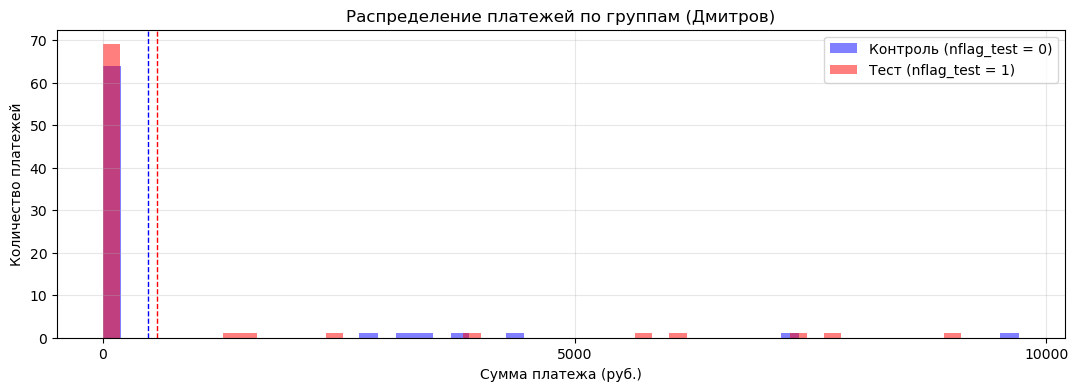


Количество наблюдений в группе: 1) "контроль" = 71  2) "тест" = 78 . Разница между группами = 8.97%

Анализ платежей в Дмитров:
1. Результаты t-теста для платежей:
t-критерий: -0.3311
p-value: 7.41e-01
p-value (7.41e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 483.4507   2) второй ряд = 579.3333   3) разница средних = -95.8826
2. Результаты теста Манна-Уитни для платежей:
U-критерий: 2722.0000
p-value: 7.42e-01
p-value (7.42e-01) >= alpha (0.05), разница между распределениями статистически не значима, гипотеза H0 подтверждается.

Анализ конверсии в Дмитров:
1. Результаты t-теста для конверсии:
t-критерий: -0.3286
p-value: 7.43e-01
p-value (7.43e-01) >= alpha (0.05), разница между средними статистически не значима, гипотеза H0 подтверждается.
Средние значения рядов:  1) первый ряд = 0.0986   2) второй ряд = 0.1154   3) разница средних = -0.0168
2. Результаты теста Манна-Уитни для конверсии:
U

In [28]:
# Анализ платежей и конверсии для остальных городов (кроме Москвы и Санкт-Петербурга)

# Подготавливаем список оставшихся для анализа городов
all_cities = cleaned_data['city'].unique()    # Получаем список всех уникальных городов
cities_to_analyze = [city for city in all_cities if city not in ['Москва', 'Санкт-Петербург']]   # Исключаем Москву и Санкт-Петербург

# Цикл по оставшимся городам
for city in cities_to_analyze:
    print(f"\n=== Анализ для города: {city} ===\n")

    # Фильтруем данные по городу для контрольной и тестовой групп
    city_control_payments = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == city)]['total_payment']
    city_test_payments = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == city)]['total_payment']
    city_control_conversion = cleaned_data[(cleaned_data['nflag_test'] == 0) & (cleaned_data['city'] == city)]['payment_flag']
    city_test_conversion = cleaned_data[(cleaned_data['nflag_test'] == 1) & (cleaned_data['city'] == city)]['payment_flag']

    # Гистограмма платежей
    print(f"Построение гистограммы для {city}:")
    plt.figure(figsize = (13, 4))
    plt.hist(city_control_payments, bins = 50, alpha = 0.5, color = 'blue', label = 'Контроль (nflag_test = 0)')
    plt.hist(city_test_payments, bins = 50, alpha = 0.5, color = 'red', label = 'Тест (nflag_test = 1)')
    plt.axvline(city_control_payments.mean(), color = 'blue', linestyle = 'dashed', linewidth = 1)
    plt.axvline(city_test_payments.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
    plt.title(f'Распределение платежей по группам ({city})')
    plt.xlabel('Сумма платежа (руб.)')
    plt.ylabel('Количество платежей')
    plt.legend()
    plt.grid(True, alpha = 0.3)
    plt.xticks(range(0, int(max(city_control_payments.max(), city_test_payments.max())) + 5000, 5000))
    plt.show()

    # Сравнение количества наблюдений в обеих группах
    control_count_city = len(city_control_payments)
    test_count_city = len(city_test_payments)
    if control_count_city >= test_count_city:
        percentage_diff_city = round(((control_count_city - test_count_city) / control_count_city) * 100, 2)
    else:
        percentage_diff_city = round(((test_count_city - control_count_city) / test_count_city) * 100, 2)
    print(f"\nКоличество наблюдений в группе: 1) \"контроль\" = {control_count_city}  2) \"тест\" = {test_count_city} . Разница между группами = {percentage_diff_city}%\n")

    # Анализ платежей
    print(f"Анализ платежей в {city}:")
    print("1. Результаты t-теста для платежей:")
    test_calc(city_control_payments, city_test_payments)
    print("2. Результаты теста Манна-Уитни для платежей:")
    mann_whitney_func(city_control_payments, city_test_payments)

    # Анализ конверсии
    print(f"\nАнализ конверсии в {city}:")
    print("1. Результаты t-теста для конверсии:")
    test_calc(city_control_conversion, city_test_conversion)
    print("2. Результаты теста Манна-Уитни для конверсии:")
    mann_whitney_func(city_control_conversion, city_test_conversion)

Краткие выводы по городам:

***   Справочно: общие результаты по всем 15 городам сразу: разница средних по платежам = -263.09 руб. (12.0%) и по конверсиям -4.4 п.п.   ***

1. Красноярск

Платежи: t-критерий: -0.1200, p-value: 9.04e-01 (H0). U-критерий: 4,413,418.0, p-value: 8.77e-01 (H0). Средние: контроль 2428.78 руб., тест 2437.50 руб., разница -8.72 руб. (0.36%). Выборки: 2900 и 3037, разница 4.51%.
Конверсия: t-критерий: 0.2786, p-value: 7.81e-01 (H0). U-критерий: 4,419,468.0, p-value: 7.81e-01 (H0). Средние: контроль 56.14%, тест 55.78%, разница 0.36 п.п.
Эффект от проведения A/B-теста: отсутствует.

2. Мурманск

Платежи: t-критерий: -0.0690, p-value: 9.45e-01 (H0). U-критерий: 554,067.5, p-value: 5.43e-01 (H0). Средние: контроль 1857.22 руб., тест 1865.27 руб., разница -8.05 руб. (0.43%). Выборки: 1065 и 1055, разница 0.94%.
Конверсия: t-критерий: -0.8460, p-value: 3.98e-01 (H0). U-критерий: 551,570.0, p-value: 3.98e-01 (H0). Средние: контроль 41.88%, тест 43.70%, разница -1.82 п.п.
Эффект от проведения A/B-теста: отсутствует.

3. Казань

Платежи: t-критерий: -1.0655, p-value: 2.87e-01 (H0). U-критерий: 3,178,575.0, p-value: 3.77e-01 (H0). Средние: контроль 2610.69 руб., тест 2731.91 руб., разница -121.22 руб. (4.64%). Выборки: 2577 и 2500, разница 2.99%.
Конверсия: t-критерий: -0.2730, p-value: 7.85e-01 (H0). U-критерий: 3,208,915.5, p-value: 7.85e-01 (H0). Средние: контроль 47.50%, тест 47.88%, разница -0.38 п.п.
Эффект от проведения A/B-теста: отсутствует.

4. Саратов

Платежи: t-критерий: 0.1052, p-value: 9.16e-01 (H0). U-критерий: 557,976.5, p-value: 7.83e-01 (H0). Средние: контроль 2541.65 руб., тест 2528.79 руб., разница 12.86 руб. (-0.51%). Выборки: 1109 и 1013, разница 8.66%.
Конверсия: t-критерий: -0.6508, p-value: 5.15e-01 (H0). U-критерий: 553,867.0, p-value: 5.15e-01 (H0). Средние: контроль 57.44%, тест 58.84%, разница -1.40 п.п.
Эффект от проведения A/B-теста: отсутствует.

5. Тольятти

Платежи: t-критерий: -1.5046, p-value: 1.33e-01 (H0). U-критерий: 14,709.5, p-value: 2.21e-01 (H0). Средние: контроль 2439.46 руб., тест 2902.41 руб., разница -462.95 руб. (18.97%). Выборки: 167 и 190, разница 12.11%.
Конверсия: t-критерий: -1.1851, p-value: 2.37e-01 (H0). U-критерий: 14,893.0, p-value: 2.36e-01 (H0). Средние: контроль 58.08%, тест 64.21%, разница -6.13 п.п.
Эффект от проведения A/B-теста: отсутствует.

6. Тюмень

Платежи: t-критерий: -0.9265, p-value: 3.55e-01 (H0). U-критерий: 8,239.0, p-value: 3.81e-02 (H1). Средние: контроль 1743.38 руб., тест 2043.82 руб., разница -300.45 руб. (17.24%). Выборки: 146 и 130, разница 10.96%. Доход: 39,059 руб.
Конверсия: t-критерий: -2.4598, p-value: 1.45e-02 (H1). U-критерий: 8,101.0, p-value: 1.48e-02 (H1). Средние: контроль 37.67%, тест 52.31%, разница -14.64 п.п. Доход: 38,833 руб. (19 клиентов).
Эффект от проведения A/B-теста: значим (по платежам: принимаем результаты непараметрического теста Манна-Уитни более надежными, чем результаты t-теста, т.к. для t-теста выборка слишком мала).

7. Волгоград

Платежи: t-критерий: 2.0893, p-value: 3.69e-02 (H1). U-критерий: 245,743.0, p-value: 3.32e-02 (H1). Средние: контроль 2601.76 руб., тест 2288.87 руб., разница 312.89 руб. (-12.03%). Выборки: 703 и 657, разница 6.54%. Убыток(-): 205,568.73 руб.
Конверсия: t-критерий: 1.6222, p-value: 1.05e-01 (H0). U-критерий: 240,982.5, p-value: 1.05e-01 (H0). Средние: контроль 59.60%, тест 55.25%, разница 4.35 п.п.
Эффект от проведения A/B-теста: значим по платежам, но отрицателен.

8. Сочи

Платежи: t-критерий: 1.5432, p-value: 1.23e-01 (H0). U-критерий: 337,587.5, p-value: 5.70e-02 (H0), однако, учитывая ненормальность данных, эффект м.б. на грани значимости (м.б. значим при более строгом пороге). Средние: контроль 2523.08 руб., тест 2305.83 руб., разница 217.25 руб. (-8.61%). Выборки: 806 и 796, разница 1.24%.
Конверсия: t-критерий: 1.9850, p-value: 4.73e-02 (H1). U-критерий: 336,608.0, p-value: 4.74e-02 (H1). Средние: контроль 57.44%, тест 52.51%, разница 4.93 п.п. Убыток(-): 89,927.37 руб. (-39 клиентов).
Эффект от проведения A/B-теста: значим по конверсии, но отрицателен.

9. Владимир

Платежи: t-критерий: -2.5770, p-value: 1.01e-02 (H1). U-критерий: 143,847.0, p-value: 3.17e-02 (H1). Средние: контроль 2108.61 руб., тест 2547.22 руб., разница -438.61 руб. (20.80%). Выборки: 608 и 509, разница 16.28%. Доход: 223,252 руб.
Конверсия: t-критерий: -1.7249, p-value: 8.48e-02 (H0). U-критерий: 146,729.5, p-value: 8.48e-02 (H0). Средние: контроль 49.84%, тест 55.01%, разница -5.17 п.п.
Эффект от проведения A/B-теста: значим по платежам.

10. Самара

Платежи: t-критерий: -11.5408, p-value: 1.10e-29 (H1). U-критерий: 233,516.5, p-value: 4.33e-30 (H1). Средние: контроль 1718.42 руб., тест 3262.79 руб., разница -1544.37 руб. (89.87%). Выборки: 846 и 802, разница 5.20%. Доход: 1,238,584 руб.
Конверсия: t-критерий: -11.8462, p-value: 3.98e-31 (H1). U-критерий: 245,193.0, p-value: 5.59e-30 (H1). Средние: контроль 43.97%, тест 71.70%, разница -27.72 п.п. Доход: 724,339 руб. (222 клиента).
Эффект от проведения A/B-теста: значим.

11. Краснодар

Платежи: t-критерий: 1.7188, p-value: 8.58e-02 (H0). U-критерий: 609,837.0, p-value: 5.94e-02 (H0), однако, учитывая ненормальность данных, эффект м.б. на грани значимости (м.б. значим при более строгом пороге). Средние: контроль 2912.43 руб., тест 2696.80 руб., разница 215.63 руб. (-7.40%). Выборки: 1139 и 1024, разница 10.10%.
Конверсия: t-критерий: 1.8790, p-value: 6.04e-02 (H0). U-критерий: 605,880.5, p-value: 6.04e-02 (H0). Средние: контроль 65.32%, тест 61.43%, разница 3.89 п.п.
Эффект от проведения A/B-теста: отсутствует.

12. Сахалинск

Платежи: t-критерий: -1.6271, p-value: 1.06e-01 (H0). U-критерий: 2,690.5, p-value: 1.99e-01 (H0). Средние: контроль 600.15 руб., тест 1171.45 руб., разница -571.30 руб. (95.20%). Выборки: 78 и 75, разница 3.85%.
Конверсия: t-критерий: -1.1704, p-value: 2.44e-01 (H0). U-критерий: 2,713.5, p-value: 2.44e-01 (H0). Средние: контроль 14.10%, тест 21.33%, разница -7.23 п.п.
Эффект от проведения A/B-теста: отсутствует.

13. Дмитров

Платежи: t-критерий: -0.3311, p-value: 7.41e-01 (H0). U-критерий: 2,722.0, p-value: 7.42e-01 (H0). Средние: контроль 483.45 руб., тест 579.33 руб., разница -95.88 руб. (19.83%). Выборки: 71 и 78, разница 8.97%.
Конверсия: t-критерий: -0.3286, p-value: 7.43e-01 (H0). U-критерий: 2,722.5, p-value: 7.44e-01 (H0). Средние: контроль 9.86%, тест 11.54%, разница -1.68 п.п.
Эффект от проведения A/B-теста: отсутствует.

| Город            | Метрика    | t-критерий | p-value      | H0/H1 | U-критерий  | p-value      | H0/H1 | Средние (контр. / тест)   | Разница      | Выборки (контр. / тест) | Разница выборок | Доход/Убыток  | Эффект от проведения A/B теста         |
|------------------|------------|------------|--------------|-------|-------------|--------------|-------|---------------------------|--------------|-------------------------|-----------------|---------------|-----------------------------------------|
| Санкт-Петербург  | Платежи    | -8.7596    | 2.32e-18     | H1    | 8,809,444.5 | 2.04e-20     | H1    | 1913.56 руб. / 2427.46 руб. | -513.90 руб. (26.9%) | 4434 / 4445 | 0.25%           | 2,284,670 руб. | значим                                 |
|                  | Конверсия  | -9.3525    | 1.07e-20     | H1    | 8,881,151.0 | 1.31e-20     | H1    | 44.84% / 54.71%          | -9.88 п.п.    |                 |                 | 1,065,434 руб. (439 кл-тов) | значим                                 |
| Москва           | Платежи    | -7.6765    | 1.76e-14     | H1    | 17,582,441.5 | 7.01e-16     | H1    | 1986.18 руб. / 2367.96 руб. | -381.78 руб. (19.2%) | 6224 / 6134 | 1.45%           | 2,341,798 руб. | значим                                 |
|                  | Конверсия  | -6.1903    | 6.19e-10     | H1    | 18,028,079.0 | 6.37e-10     | H1    | 48.79% / 54.35%          | -5.56 п.п.    |                 |                 | 807,474 руб. (341 кл-тов) | значим                                 |
| Самара           | Платежи    | -11.5408   | 1.10e-29     | H1    | 233,516.5   | 4.33e-30     | H1    | 1718.42 руб. / 3262.79 руб. | -1544.37 руб. (89.87%) | 846 / 802 | 5.20%           | 1,238,584 руб.| значим                                 |
|                  | Конверсия  | -11.8462   | 3.98e-31     | H1    | 245,193.0   | 5.59e-30     | H1    | 43.97% / 71.70%          | -27.72 п.п.   |                 |                 | 724,339 руб. (222 кл-тов) | значим                                 |
| Владимир         | Платежи    | -2.5770    | 1.01e-02     | H1    | 143,847.0   | 3.17e-02     | H1    | 2108.61 руб. / 2547.22 руб. | -438.61 руб. (20.80%) | 608 / 509 | 16.28%          | 223,252 руб.  | значим                                 |
|                  | Конверсия  | -1.7249    | 8.48e-02     | H0    | 146,729.5   | 8.48e-02     | H0    | 49.84% / 55.01%          | -5.17 п.п.    |                 |                 | -             | отсутствует                             |
| Тюмень           | Платежи    | -0.9265    | 3.55e-01     | H0    | 8,239.0     | 3.81e-02     | H1    | 1743.38 руб. / 2043.82 руб. | -300.45 руб. (17.24%) | 146 / 130  | 10.96%          | 39,059 руб.   | значим                                 |
|                  | Конверсия  | -2.4598    | 1.45e-02     | H1    | 8,101.0     | 1.48e-02     | H1    | 37.67% / 52.31%          | -14.64 п.п.   |                 |                 | 38,833 руб. (19 кл-тов) | значим                                 |
| Сочи             | Платежи    | 1.5432     | 1.23e-01     | H0    | 337,587.5   | 5.70e-02     | H0    | 2523.08 руб. / 2305.83 руб. | 217.25 руб. (-8.61%) | 806 / 796 | 1.24%           | -             | отсутствует                             |
|                  | Конверсия  | 1.9850     | 4.73e-02     | H1    | 336,608.0   | 4.74e-02     | H1    | 57.44% / 52.51%          | 4.93 п.п.   |                 |                 | -89,927.37 руб. (-39 кл.) | значим, но отрицателен                 |
| Волгоград        | Платежи    | 2.0893     | 3.69e-02     | H1    | 245,743.0   | 3.32e-02     | H1    | 2601.76 руб. / 2288.87 руб. | 312.89 руб. (-12.03%) | 703 / 657 | 6.54%           | -205,568.73 руб. | значим, но отрицателен                 |
|                  | Конверсия  | 1.6222     | 1.05e-01     | H0    | 240,982.5   | 1.05e-01     | H0    | 59.60% / 55.25%          | 4.35 п.п.   |                 |                 | -             | отсутствует                             |
| Красноярск       | Платежи    | -0.1200    | 9.04e-01     | H0    | 4,413,418.0 | 8.77e-01     | H0    | 2428.78 руб. / 2437.50 руб. | -8.72 руб. (0.36%) | 2900 / 3037 | 4.51%           | -             | отсутствует                             |
|                  | Конверсия  | 0.2786     | 7.81e-01     | H0    | 4,419,468.0 | 7.81e-01     | H0    | 56.14% / 55.78%          | 0.36 п.п.   |                 |                 | -             | отсутствует                             |
| Казань           | Платежи    | -1.0655    | 2.87e-01     | H0    | 3,178,575.0 | 3.77e-01     | H0    | 2610.69 руб. / 2731.91 руб. | -121.22 руб. (4.64%) | 2577 / 2500 | 2.99%           | -             | отсутствует                             |
|                  | Конверсия  | -0.2730    | 7.85e-01     | H0    | 3,208,915.5 | 7.85e-01     | H0    | 47.50% / 47.88%          | -0.38 п.п.    |                 |                 | -             | отсутствует                             |
| Краснодар        | Платежи    | 1.7188     | 8.58e-02     | H0    | 609,837.0   | 5.94e-02     | H0    | 2912.43 руб. / 2696.80 руб. | 215.63 руб. (-7.40%) | 1139 / 1024 | 10.10%          | -             | отсутствует                             |
|                  | Конверсия  | 1.8790     | 6.04e-02     | H0    | 605,880.5   | 6.04e-02     | H0    | 65.32% / 61.43%          | 3.89 п.п.   |                 |                 | -             | отсутствует                             |
| Саратов          | Платежи    | 0.1052     | 9.16e-01     | H0    | 557,976.5   | 7.83e-01     | H0    | 2541.65 руб. / 2528.79 руб. | 12.86 руб. (-0.51%) | 1109 / 1013 | 8.66%           | -             | отсутствует                             |
|                  | Конверсия  | -0.6508    | 5.15e-01     | H0    | 553,867.0   | 5.15e-01     | H0    | 57.44% / 58.84%          | -1.40 п.п.    |                 |                 | -             | отсутствует                             |
| Мурманск         | Платежи    | -0.0690    | 9.45e-01     | H0    | 554,067.5   | 5.43e-01     | H0    | 1857.22 руб. / 1865.27 руб. | -8.05 руб. (0.43%) | 1065 / 1055 | 0.94%           | -             | отсутствует                             |
|                  | Конверсия  | -0.8460    | 3.98e-01     | H0    | 551,570.0   | 3.98e-01     | H0    | 41.88% / 43.70%          | -1.82 п.п.    |                 |                 | -             | отсутствует                             |
| Тольятти         | Платежи    | -1.5046    | 1.33e-01     | H0    | 14,709.5    | 2.21e-01     | H0    | 2439.46 руб. / 2902.41 руб. | -462.95 руб. (18.97%) | 167 / 190  | 12.11%          | -             | отсутствует                             |
|                  | Конверсия  | -1.1851    | 2.37e-01     | H0    | 14,893.0    | 2.36e-01     | H0    | 58.08% / 64.21%          | -6.13 п.п.    |                 |                 | -             | отсутствует                             |
| Сахалинск        | Платежи    | -1.6271    | 1.06e-01     | H0    | 2,690.5     | 1.99e-01     | H0    | 600.15 руб. / 1171.45 руб. | -571.30 руб. (95.20%) | 78 / 75   | 3.85%           | -             | отсутствует                             |
|                  | Конверсия  | -1.1704    | 2.44e-01     | H0    | 2,713.5     | 2.44e-01     | H0    | 14.10% / 21.33%          | -7.23 п.п.    |                 |                 | -             | отсутствует                             |
| Дмитров          | Платежи    | -0.3311    | 7.41e-01     | H0    | 2,722.0     | 7.42e-01     | H0    | 483.45 руб. / 579.33 руб. | -95.88 руб. (19.83%) | 71 / 78   | 8.97%           | -             | отсутствует                             |
|                  | Конверсия  | -0.3286    | 7.43e-01     | H0    | 2,722.5     | 7.44e-01     | H0    | 9.86% / 11.54%           | -1.68 п.п.    |                 |                 | -             | отсутствует                             |

<tr><td colspan = "14"><strong>Справочно, по всем 15 городам сразу: 1) общий экономический эффект составляет 8,467,946.90 руб., а количество дополнительных клиентов = 982;   2) разница средних по платежам = -263.09 руб. (12.0%) и по конверсиям = 4.4 п.п.</strong></td></tr>

### 7. Отчет по A/B-тесту

In [29]:
#  проверяем количество уникальных пар значений ТТ + город (из уже очищенного по всем критериям датафрейма)
unique_pairs = cleaned_data[['city', 'id_trading_point']].drop_duplicates()
unique_count = unique_pairs.shape[0]   # количество уникальных пар
print(f"Итого уникальных пар значений торговой точки и города: {unique_count}")

Итого уникальных пар значений торговой точки и города: 51


In [30]:
# Создаём пустой датафрейм с требуемыми полями
columns = ["city", "id_trading_point", "count_test", "count_control", "count_all", "percent_count", "avg_payment_test",
    "avg_payment_control", "diff", "sigma_test", "sigma_control", "ttest", "pvalue_ttest", "utest", "pvalue_utest", "label"]
dtypes = {"city": "object", "id_trading_point": "int64", "count_test": "int64", "count_control": "int64", "count_all": "int64",
    "percent_count": "float64", "avg_payment_test": "float64", "avg_payment_control": "float64", "diff": "float64", "sigma_test": "float64",
    "sigma_control": "float64", "ttest": "float64", "pvalue_ttest": "float64", "utest": "float64", "pvalue_utest": "float64", "label": "object"}
# задание dtype в явном виде - устраняет предупреждение FutureWarning при использовании pd.concat
df = pd.DataFrame(columns = columns).astype(dtypes)

# Группируем данные по городам и торговым точкам
grouped = cleaned_data.groupby(["city", "id_trading_point"])

# Общее количество наблюдений для расчёта percent_count
total_observations = len(cleaned_data)

# Цикл по группам (город + торговая точка)
for (city, id_trading_point), group in grouped:
    # Разделяем тестовую и контрольную группы
    test_group = group[group["nflag_test"] == 1]["total_payment"]
    control_group = group[group["nflag_test"] == 0]["total_payment"]
    
    # Количество наблюдений
    count_test = len(test_group)
    count_control = len(control_group)
    count_all = count_test + count_control
    percent_count = (count_all / total_observations) * 100 if total_observations > 0 else 0
    
    # Средние платежи
    avg_payment_test = test_group.mean() if count_test > 0 else 0
    avg_payment_control = control_group.mean() if count_control > 0 else 0
    diff = avg_payment_test - avg_payment_control
    
    # Стандартное отклонение
    sigma_test = test_group.std() if count_test > 1 else 0  # нужно минимум 2 наблюдения для std
    sigma_control = control_group.std() if count_control > 1 else 0
    
    # Статистические тесты
    if count_test > 0 and count_control > 0:
        ttest_stat, pvalue_ttest = ttest_ind(test_group, control_group, equal_var = False, nan_policy = "omit")
        # проводим Welch's t-test (предполагая, что дисперсии м.б. <>). Удаляем NaN перед тестом, чтобы избежать ошибок (nan_policy = "omit") 
        utest_stat, pvalue_utest = mannwhitneyu(test_group, control_group, alternative = "two-sided")
        # two-sided указан для исключения путаницы: проверяем отличие тестовой и контрольной групп в любом направлении (+ / -)
    else:
        ttest_stat, pvalue_ttest, utest_stat, pvalue_utest = np.nan, np.nan, np.nan, np.nan
    
    # Определяем лейбл
    if pvalue_utest < 0.05 and not np.isnan(pvalue_utest):   # используем тест Манна-Уитни, т.к. данные не нормальны
        if diff > 0:
            label = "положительный"
        else:
            label = "отрицательный"
    else:
        label = "нейтральный"
    
    # Добавляем строку в датафрейм
    new_row = {"city": city, "id_trading_point": id_trading_point, "count_test": count_test, "count_control": count_control,
        "count_all": count_all, "percent_count": percent_count, "avg_payment_test": avg_payment_test, "avg_payment_control": avg_payment_control,
        "diff": diff, "sigma_test": sigma_test, "sigma_control": sigma_control, "ttest": ttest_stat, "pvalue_ttest": pvalue_ttest,
        "utest": utest_stat, "pvalue_utest": pvalue_utest, "label": label}
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index = True)

df

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,utest,pvalue_utest,label
0,Владимир,11,509,608,1117,2.464804,2547.220039,2108.610197,438.609842,3023.702164,2663.038392,2.548235,1.097240e-02,165625.0,3.166761e-02,положительный
1,Волгоград,66,657,703,1360,3.001015,2288.870624,2601.761024,-312.890400,2682.567610,2830.193773,-2.093060,3.652898e-02,216128.0,3.323940e-02,отрицательный
2,Дмитров,2,78,71,149,0.328788,579.333333,483.450704,95.882629,1860.762430,1654.923182,0.332885,7.396958e-01,2816.0,7.422552e-01,нейтральный
3,Казань,439,355,351,706,1.557880,2481.960563,2400.635328,81.325236,4040.441007,3722.117072,0.278197,7.809436e-01,62211.0,9.705717e-01,нейтральный
4,Казань,477,382,386,768,1.694691,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.892096,3.726243e-01,72517.0,6.640893e-01,нейтральный
5,Казань,516,634,636,1270,2.802418,3237.200315,2880.484277,356.716039,4537.103842,3819.292813,1.515480,1.299076e-01,206818.0,4.018400e-01,нейтральный
6,Казань,544,377,416,793,1.749857,2621.427056,2635.548077,-14.121021,3714.894751,4639.820746,-0.047506,9.621221e-01,81862.0,2.433636e-01,нейтральный
7,Казань,699,482,494,976,2.153670,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594576,5.522650e-01,114960.5,3.096216e-01,нейтральный
8,Казань,991,270,294,564,1.244539,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.230816,2.613223e-02,43029.0,6.467167e-02,нейтральный
9,Краснодар,1101,785,869,1654,3.649764,2176.003822,2523.578826,-347.575005,2722.624494,2960.352338,-2.487270,1.297082e-02,319375.0,1.816506e-02,отрицательный


#### Рекомендации для дальнейших запусков A/B-теста:

На основе результатов A/B-теста в 51 торговой точке, проведённого в 15 городах, предлагаются следующие рекомендации:

1. Убедиться, что система тестирования работает верно: предварительно провести A/A-тест.

2. Увеличение размера выборок: точки с малыми выборками (например, Дмитров_2: 149 наблюдений) часто дают нейтральный результат. Установить минимальный порог в 500 наблюдений на одну группу. В городах с потенциально малой выборкой можно увеличить длительность эксперимента с трех, до 4-6 месяцев, но стоит учитывать влияние сезонности и праздничных периодов.

3. Обработка вариативности данных: высокое стандартное отклонение (например, Казань_991: σ_test = 4719.59, σ_control = 3633.94) снижает значимость теста. Исключить выбросы (платежи выше 99-го перцентиля) и, возможно, избавиться от нулевых значений платежей (в проведенном тесте составляющих значимую часть данных).

4. Адаптация тестового воздействия по городам: положительные результаты доминируют в Санкт-Петербурге (8 ТТ) и Москве (4 ТТ), тогда как Казань (6 ТТ) и Красноярск (5 ТТ) - нейтральны. Изменить параметры тестового воздействия по разным городам, с учётом региональных особенностей.

5. В целях обеспечения баланса тестовой и контрольной групп: улучшить методику рандомного распределения клиентов на группы.

#### Выгрузка данных в Excel

In [31]:
# устанавливаем модуль XlsxWriter
!pip install XlsxWriter

# проверяем, что модуль XlsxWriter установлен
import xlsxwriter
print(xlsxwriter.__version__)

3.2.3


In [32]:
# Выгружаем результаты в Excel с разными листами по лейблам
writer = pd.ExcelWriter("ab_test_results.xlsx", engine = "xlsxwriter")

# Фильтруем датафрейм по лейблам и записываем в соответствующие листы
df[df["label"] == "положительный"].to_excel(writer, sheet_name = "Positive", index = False)
df[df["label"] == "отрицательный"].to_excel(writer, sheet_name = "Negative", index = False)
df[df["label"] == "нейтральный"].to_excel(writer, sheet_name = "Neutral", index = False)

# Закрываем writer и сохраняем файл
writer.close()

print("Результаты успешно выгружены в ab_test_results.xlsx")

Результаты успешно выгружены в ab_test_results.xlsx
